## **Devoir 4 : Recherche heuristique**

### Identification

Nom : Adam Jeribi <br/>
Numéro étudiant : 300278715<br>

<br/>
<hr/>

## **Vue d'ensemble**

Le **Problème du Voyageur de Commerce (TSP)** est un problème classique d'optimisation en informatique et en recherche opérationnelle. Étant donné un ensemble de villes et les distances entre elles, l'objectif est de trouver le trajet le plus court possible qui visite chaque ville exactement une fois et revient à la ville de départ. Bien que sa formulation soit simple, résoudre le TSP est un défi computationnel en raison de la croissance factorielle du nombre de routes possibles en fonction du nombre de villes.

Le TSP est classé comme un problème NP-difficile, ce qui signifie qu'il n'existe pas d'algorithme efficace connu pour le résoudre de manière optimale pour de grandes instances. Cette complexité, combinée à son importance pratique dans des domaines comme la logistique, la fabrication et la conception de circuits, a fait du TSP un problème de référence pour évaluer les algorithmes d'optimisation.

Dans ce devoir, vous explorerez trois approches différentes pour résoudre le TSP :

- **Algorithme glouton** : Une méthode heuristique qui construit une solution de manière incrémentale en choisissant des décisions localement optimales.
- **Recuit simulé (SA)** : Un algorithme probabiliste inspiré du processus de recuit en métallurgie.
- **Algorithme génétique (GA)** : Un algorithme évolutif qui imite la sélection naturelle pour améliorer les solutions de manière itérative.

Le livrable final pour ce devoir sera un Jupyter Notebook documentant votre implémentation, vos résultats et vos observations pour chaque approche.

## **Objectifs d'apprentissage**

- **Explorer** et **implémenter** différents algorithmes basés sur la recherche.
- **Développer** un algorithme de recuit simulé avec une stratégie efficace pour définir la température initiale.
- **Adapter** et **appliquer** un algorithme génétique pour résoudre le TSP.
- **Analyser** et **évaluer** la performance de chaque algorithme par rapport à des solutions optimales connues.

## **Soumission**

- **Date limite :**
   - Soumettez votre notebook avant le 4 décembre à 23 h.
- **Devoir individuel ou en groupe :**
   - Ce devoir peut être réalisé individuellement (groupe de 1 étudiant) ou en collaboration en binôme (groupe de 2 étudiants).
   - Un groupe doit soumettre une seule soumission conjointe.
   - Avant de soumettre, il est nécessaire de **s'enregistrer comme groupe** sur Brightspace.
- **Plateforme de soumission :**
   - Téléchargez votre soumission sur Brightspace dans la section Devoirs (Devoir 4).
- **Format de soumission :**
   - Soumettez une copie de votre notebook sur Brightspace.

**Avis important :** Si le correcteur ne peut pas exécuter votre code, votre soumission recevra une note de zéro. Il est de votre responsabilité de vous assurer que votre soumission fonctionne sur un autre ordinateur que le vôtre et que toutes les cellules de votre notebook sont exécutables.

## **Jeux de données**

Les jeux de données utilisés dans ce devoir proviennent du [dépôt GitHub TSPLIB](https://github.com/mastqe/tsplib), qui fournit des instances de référence standard pour le problème du voyageur de commerce (TSP). Ces jeux de données sont définis comme **Euclidiens**, ce qui signifie que la distance entre deux villes est calculée à l'aide de la métrique euclidienne basée sur leurs coordonnées.

Pour vos tests, vous utiliserez les jeux de données **berlin52-24-4** et **st70-24**. Chacun de ces jeux est un sous-ensemble composé de 24 villes des problèmes respectifs. La borne inférieure du coût pour ces instances a été déterminée en utilisant la programmation dynamique, spécifiquement l'algorithme de Held-Karp.

1. **berlin52-24-4** :
   - Nombre de villes : 24
   - Coût de la solution optimale : **5890,92**

2. **st70-24-4** :
   - Nombre de villes : 24
   - Coût de la solution optimale : **468,88**

Ces ensembles de données sont destinés à évaluer la performance de vos algorithmes, vous permettant de comparer vos résultats avec les solutions optimales établies. Les données sont accessibles sur GitHub au lien suivant : [ici](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a4). De plus, le sous-répertoire `extra` contient des problèmes supplémentaires qui peuvent vous aider à compléter ce devoir.

Pour la question bonus facultative, vous travaillerez avec les deux jeux de données suivants :

3. **berlin52** :
   - Nombre de villes : 52
   - Description : Un jeu de données de taille moyenne avec une distribution spatiale réaliste des villes.
   - Coût de la solution optimale : **7542**

4. **st70** :
   - Nombre de villes : 70
   - Description : Un jeu de données légèrement plus grand avec une complexité accrue.
   - Coût de la solution optimale : **675**

<br>
<hr/>

## **0. Code donné**

Voici un Jupyter Notebook présentant des algorithmes gloutons et un algorithme génétique pour résoudre le problème du sac à dos 0/1.

<a target="_blank" href="https://colab.research.google.com/github/turcotte/csi4506-a24/blob/main/notebooks/lectures/16/knapsack.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Ouvrir dans Colab"/> </a>

Les deux conférences suivantes peuvent être utiles pour ce devoir.

- [Conférence 15](https://turcotte.xyz/teaching/csi-4506/lectures/15/slides.html) (recuit simulé)
- [Conférence 16](https://turcotte.xyz/teaching/csi-4506/lectures/16/slides.html) (algorithme génétique)

### 0.1. Imports

In [2]:
# Imports nécessaires pour le devoir :

import numpy as np
import pandas as pd
import requests
import math
import time

### 0.2. Lecture des fichiers TSP

Une fonction pour lire les fichiers TSP à partir d'un site web.

In [3]:
def read_tsp(url):

    """
    Lit un fichier .tsp depuis une URL donnée et renvoie un tableau NumPy des coordonnées.

    Paramètres :
    -----------
    url : str
        L'URL du fichier .tsp.

    Renvoie :
    --------
    coordinates : ndarray
        Un tableau NumPy contenant les coordonnées extraites du fichier .tsp.

    Description :
    ------------
    Cette fonction récupère le contenu d'un fichier .tsp depuis une URL spécifiée et le parcourt
    pour extraire les coordonnées des villes. Elle recherche la section 'NODE_COORD_SECTION' pour
    commencer à lire les coordonnées et s'arrête à 'EOF'. La fonction gère les erreurs potentielles
    en vérifiant le statut de la réponse HTTP et s'assure que les coordonnées sont correctement
    analysées en tant que nombres à virgule flottante.

    Exemple :
    --------
    >>> url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a4/berlin52-24-4.tsp'
    >>> coordinates = read_tsp(url)
    >>> print(coordinates)
    [[37.7692, -122.4443],
     [37.7689, -122.4240],
     ...
     [37.7793, -122.4192]]
    """

    try:
        # Récupérer le contenu depuis l'URL
        response = requests.get(url)
        response.raise_for_status()  # Générer une erreur HTTP pour les mauvaises réponses (4xx ou 5xx)

        # Diviser le contenu en lignes
        lines = response.text.splitlines()

        # Initialiser une liste pour stocker les coordonnées
        coordinates = []

        # Commencer à lire après la ligne NODE_COORD_SECTION
        node_section = False
        for line in lines:
            line = line.strip()
            if line == "NODE_COORD_SECTION":
                node_section = True
                continue
            elif line == "EOF":
                break

            if node_section:
                # Diviser la ligne en parties et convertir en float
                parts = line.split()
                if len(parts) >= 3:
                    # Certains fichiers incluent les indices des nœuds, on prend donc les deux dernières entrées comme coordonnées
                    x, y = float(parts[-2]), float(parts[-1])
                    coordinates.append((x, y))

        # Convertir la liste de coordonnées en un tableau NumPy
        return np.array(coordinates)

    except requests.exceptions.RequestException as e:
        print(f"Une erreur s'est produite lors de la récupération du fichier TSP : {e}")
        return None
    except ValueError as e:
        print(f"Une erreur s'est produite lors de l'analyse des coordonnées : {e}")
        return None

In [4]:
URL = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a4/'

berlin52_24_4 = read_tsp(URL + 'berlin52-24-4.tsp')
st70_24_4 = read_tsp(URL + 'st70-24-4.tsp')
berlin52 = read_tsp(URL + 'berlin52.tsp')
st70 = read_tsp(URL + 'st70.tsp')

La fonction suivante accepte les coordonnées des villes en entrée et produit une matrice de distances.

In [5]:
def get_distance_matrix(coordinates):

    """
        Prend les coordonnées en entrée et renvoie une matrice de distances.
        Entrée : coordinates (nn.array) - les coordonnées d'entrée.
        Sortie : distance_matrix (np.array) - la matrice de distances (num_cities x num_cities).
    """

    num_cities = len(coordinates)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i][j] = np.linalg.norm(coordinates[i] - coordinates[j])

    return distance_matrix 

Les fonctions suivantes peuvent aider à visualiser les résultats et à déboguer vos programmes.

In [6]:
import matplotlib.pyplot as plt

def plot_cities(coordinates, title="Villes du Problème du Voyageur de Commerce"):

    """
    Trace les coordonnées données représentant les villes.
    
    Paramètres :
    - coordinates : Un tableau 2D NumPy de forme (n, 2) représentant les coordonnées (x, y).
    - title : Titre du graphique.
    """

    # Extraire les coordonnées x et y
    x = coordinates[:, 0]
    y = coordinates[:, 1]

    plt.figure(figsize=(6, 6))

    # Tracer les villes sous forme de points rouges
    plt.scatter(x, y, c='red', zorder=2)

    # Annoter les villes avec leurs indices
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(str(i + 1), (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

    # Définir le titre et les étiquettes
    plt.title(title)
    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')
    plt.grid(True)
    plt.axis('equal')  # Échelle égale pour les axes x et y
    plt.show()

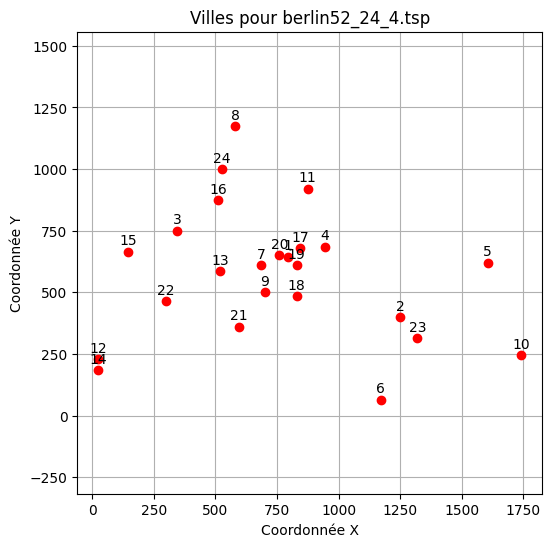

In [7]:
plot_cities(berlin52_24_4, title='Villes pour berlin52_24_4.tsp')

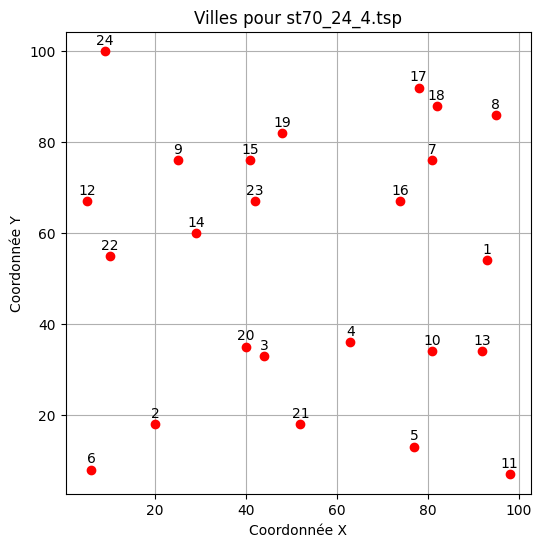

In [8]:
plot_cities(st70_24_4, title='Villes pour st70_24_4.tsp')

In [9]:
def plot_tsp_path(coordinates, path=None, title="Problème du Voyageur de Commerce"):

    """
    Trace les coordonnées données et éventuellement un chemin pour le TSP.
    
    Paramètres :
    - coordinates : Un tableau 2D NumPy de forme (n, 2) représentant les coordonnées (x, y).
    - path : Une liste ou un tableau d'indices représentant l'ordre des villes à visiter. Si None, les nœuds sont connectés dans l'ordre d'entrée.
    - title : Titre du graphique.
    """

    # Extraire les coordonnées x et y
    x = coordinates[:, 0]
    y = coordinates[:, 1]

    plt.figure(figsize=(6, 6))

    # Si un chemin est donné, réorganiser les coordonnées
    if path is not None:
        x = x[path]
        y = y[path]
    
    # Tracer les nœuds
    plt.scatter(x, y, c='red', zorder=2)

    # Annoter les nœuds avec leurs indices
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(str(i + 1), (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

    # Tracer le chemin
    plt.plot(x, y, 'b-', zorder=1)

    # Si un chemin est fourni, connecter le dernier point au premier pour compléter le tour
    if path is not None:
        plt.plot([x[-1], x[0]], [y[-1], y[0]], 'b-', zorder=1)

    # Définir le titre et les étiquettes
    plt.title(title)
    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')
    plt.grid(True)
    plt.axis('equal')  # Échelle égale pour les axes x et y
    plt.show()

### Génération des matrices de distance des jeux de données :

In [58]:
M_berlin52_24_4 = get_distance_matrix(berlin52_24_4)
M_st70_24_4 = get_distance_matrix(st70_24_4)
M_berlin52 = get_distance_matrix(berlin52)
M_st70 = get_distance_matrix(st70)

<hr/>

## **1. Implémenter les algorithmes**

### 1.1. Implémenter un solveur pour le TSP utilisant l'algorithme glouton

L'**heuristique du plus proche voisin** est un algorithme glouton utilisé pour trouver une solution faisable au Problème du Voyageur de Commerce (TSP). 
- Le processus commence par la sélection d'une ville de départ, puis visite de manière itérative la ville non visitée la plus proche jusqu'à ce que toutes les villes soient visitées. Le tour est complété en revenant au point de départ.
- Cette procédure est répétée en prenant chaque ville comme point de départ, et le tour le plus court résultant est sélectionné.
- L'algorithme évalue uniquement les routes valides, garantissant que chaque ville est visitée exactement une fois.
- Bien que cette approche construise efficacement une solution faisable au TSP, elle ne garantit pas une solution optimale.

In [60]:
# Code pour implémenter l'algorithme glouton ici.
def gloutonAlgorithme(M):
    start_time = time.time()
    
    num_cities = len(M)  
    best_tour = []  
    shortest_distance = math.inf
    for starting_city in range(num_cities):
        unvisited_cities = set(range(num_cities))
        unvisited_cities.remove(starting_city)  
        current_city = starting_city 
        tour = [starting_city + 1]  
        total_distance = 0  
        while unvisited_cities:
            nearest_city = -1
            min_distance = math.inf
            for city in unvisited_cities:
                distance = M[current_city][city]
                if distance < min_distance:
                    min_distance = distance
                    nearest_city = city
            tour.append(nearest_city + 1)
            total_distance += min_distance
            current_city = nearest_city
            unvisited_cities.remove(nearest_city)  
        total_distance += M[current_city][starting_city]
        tour.append(starting_city + 1)  
        if total_distance < shortest_distance:
            shortest_distance = total_distance
            best_tour = tour

    end_time = time.time()
    elapsed_time = round(end_time - start_time,3)
    return best_tour,shortest_distance,elapsed_time

### 1.2. Implémenter un solveur pour le TSP utilisant le recuit simulé

Pour l'implémentation de l'algorithme de recuit simulé (SA) ci-dessous, **implémentez une stratégie pour déterminer la température initiale de la recherche**.

**Suggestions** :
- Calculez le coût d'un tour aléatoire et définissez une température initiale telle que le taux d'acceptation des nouvelles solutions soit compris entre 60 % et 80 %.
- Alternativement, effectuez quelques itérations préliminaires de l'algorithme SA, en réduisant progressivement la température jusqu'à ce que le taux d'acceptation atteigne la plage souhaitée de 60 % à 80 %. Ensuite, recommencez avec cette température.

Vous devez notamment finaliser l'implémentation de la méthode `get_initial_temperature` ci-dessous.

In [12]:
def calculate_total_distance(route, distance_matrix):

    """
    Calcule la distance totale d'un trajet donné en se basant sur la matrice des distances.

    Paramètres :
    -----------
    route : ndarray
        Un tableau représentant l'ordre des villes dans le trajet (une permutation des indices de villes).
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    Renvoie :
    --------
    total_distance : float
        La distance totale du trajet, incluant le retour à la ville de départ.

    Description :
    ------------
    La fonction calcule la somme des distances entre les villes consécutives dans le trajet
    et ajoute la distance de la dernière ville pour revenir à la première, afin de compléter le tour.
    Elle suppose que la matrice des distances est symétrique et non négative.
    """
    
    total_distance = 0

    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i + 1]]

    total_distance += distance_matrix[route[-1], route[0]]  # Retour au départ

    return total_distance

In [13]:
def get_neighbor(route):

    """
    Génère une solution voisine en inversant un segment aléatoire du trajet.

    Paramètres :
    -----------
    route : ndarray
        Un tableau représentant le trajet actuel (une permutation des indices de villes).

    Renvoie :
    --------
    new_route : ndarray
        Un nouveau trajet obtenu en inversant le segment entre deux indices choisis au hasard.

    Description :
    ------------
    Cette méthode sélectionne deux indices aléatoires, `a` et `b`, dans le trajet et inverse le
    segment entre eux (inclus). Elle est couramment utilisée dans des algorithmes d'optimisation 
    comme le recuit simulé pour explorer des solutions voisines dans l'espace de recherche.
    """

    a, b = np.random.randint(0, len(route), size=2)

    if a > b:
        a, b = b, a

    new_route = route.copy()
    new_route[a:b+1] = new_route[a:b+1][::-1]  # Inverser le segment entre a et b
    
    return new_route

Finalisez l'implémentation de la méthode `get_initial_temperature`. Vous pouvez introduire des paramètres supplémentaires dans la définition de la fonction si nécessaire ; veillez à ce que toutes les modifications soient reflétées de manière cohérente dans les méthodes qui invoquent cette fonction.

In [14]:
def get_initial_temperature(distance_matrix):

    """
    Estime une température initiale pour l'algorithme de recuit simulé.

    Paramètres :
    -----------
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    Renvoie :
    --------
    initial_temp : float
        La température initiale estimée pour atteindre le taux d'acceptation spécifié.

    Description :
    ------------
    La fonction :
        - Complétez cette section.
    """

    # Code ici

    num_cities = len(distance_matrix)
    route = np.arange(num_cities)
    np.random.shuffle(route)
    current_cost = calculate_total_distance(route, distance_matrix)
    delta_costs = []
    for _ in range(100): 
        neighbor_route = get_neighbor(route)
        neighbor_cost = calculate_total_distance(neighbor_route, distance_matrix)
        delta_cost = neighbor_cost - current_cost

        if delta_cost > 0:
            delta_costs.append(delta_cost)
        route = neighbor_route
        current_cost = neighbor_cost

    if delta_costs:
        average_delta_cost = np.mean(delta_costs)
        initial_temp = -average_delta_cost / np.log(0.7)
    else:
        initial_temp = 1

    return initial_temp

In [15]:
def simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations):

    """
    Exécute l'algorithme de recuit simulé pour approximer une solution au Problème du Voyageur de Commerce (TSP).

    Paramètres :
    -----------
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.
    initial_temp : float
        La température initiale pour le processus de recuit.
    cooling_rate : float
        Le taux de diminution de la température, généralement une valeur entre 0 et 1.
    max_iterations : int
        Le nombre maximal d'itérations à effectuer.

    Renvoie :
    --------
    best_route : ndarray
        L'ordre des villes dans le meilleur trajet trouvé.
    best_cost : float
        La distance totale du meilleur trajet.
    temperatures : list
        Une liste des valeurs de température à chaque itération, utile pour l'analyse ou les graphiques.
    costs : list
        Une liste des coûts des trajets (distances) à chaque itération, utile pour l'analyse ou les graphiques.

    Description :
    ------------
    Le recuit simulé (SA) est un algorithme probabiliste d'optimisation inspiré du processus de recuit en métallurgie.
    Cette implémentation :
    - Commence avec un trajet aléatoire et l'améliore de manière itérative.
    - Accepte des solutions moins bonnes avec une probabilité dépendant de la température pour échapper aux minima locaux.
    - Réduit la température progressivement pour se concentrer sur l'exploitation à mesure que l'algorithme progresse.
    - Retourne le meilleur trajet trouvé ainsi que des données intermédiaires pour l'analyse.
    """

    num_cities = len(distance_matrix)
    current_route = np.arange(num_cities)
    np.random.shuffle(current_route)
    current_cost = calculate_total_distance(current_route, distance_matrix)
    
    best_route = current_route.copy()
    best_cost = current_cost

    temperatures = []
    costs = []

    temperature = initial_temp

    for iteration in range(max_iterations):
        # Générer une solution voisine
        neighbor_route = get_neighbor(current_route)
        neighbor_cost = calculate_total_distance(neighbor_route, distance_matrix)
        
        # Accepter la solution voisine si elle est meilleure ou avec une probabilité basée sur la température
        if neighbor_cost < current_cost or np.random.rand() < np.exp(-(neighbor_cost - current_cost) / temperature):
            current_route = neighbor_route
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_route = current_route.copy()
                best_cost = current_cost

        # Sauvegarder les données pour analyse
        temperatures.append(temperature)
        costs.append(current_cost)

        # Réduction de la température
        temperature *= cooling_rate

    return best_route, best_cost, temperatures, costs

In [37]:
def simulated_annealing_do_n(distance_matrix, initial_temp, cooling_rate=0.995, max_iterations=1000, repeats=20):
    
    """
    Effectue le recuit simulé plusieurs fois et retourne le meilleur résultat parmi toutes les exécutions.

    Paramètres:
    -----------
    distance_matrix : ndarray
    Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.
    
    initial_temp : float
    La température initiale pour le processus de recuit.
    
    cooling_rate : float
    Le taux auquel la température diminue, généralement une valeur entre 0 et 1.
    
    max_iterations : int
    Le nombre maximal d'itérations pour chaque exécution de recuit simulé.
    
    repeats : int
    Le nombre de fois que le processus de recuit simulé est répété.

    Renvoie:
    --------
    best_tour : ndarray
    L'ordre des villes dans le meilleur (le plus court) tour trouvé parmi toutes les exécutions.
    
    best_distance : float
    La distance totale du meilleur tour.
    
    best_temperatures : list
    Une liste des valeurs de température du meilleur run, utile pour l'analyse ou la représentation graphique.
    
    best_costs : list
    Une liste des coûts des routes (distances) du meilleur run, utile pour l'analyse ou la représentation graphique.

    Remarques:
    ----------
    Cette méthode utilise la fonction `simulated_annealing` pour effectuer des optimisations individuelles.
    En répétant le processus plusieurs fois, elle augmente la probabilité de trouver une solution globalement optimale ou quasi-optimale.
    """

    start_time = time.time()

    results = [
        simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations)
        for _ in range(repeats)
    ]

    # Trouver le meilleur résultat en minimisant la distance
    best_tour, best_distance, best_temperatures, best_costs = min(results, key=lambda x: x[1])

    end_time = time.time()
    elapsed_time = round(end_time - start_time,3)

    return best_tour, best_distance, best_temperatures, best_costs, elapsed_time

La fonction suivante peut aider à visualiser les résultats et à déboguer vos programmes.

In [17]:
def plot_temperature_and_cost(temperatures, costs):
    
    """
    Trace les valeurs de température et de coût au fil des itérations dans un graphique côte à côte.

    Paramètres:
    -----------
    temperatures : list ou ndarray
    Une séquence de valeurs de température enregistrées à chaque itération d'un algorithme (par exemple, recuit simulé).

    costs : list ou ndarray
    Une séquence de valeurs de coût (par exemple, distance totale ou énergie) enregistrées à chaque itération.

    Description:
    ------------
    Cette fonction génère deux sous-graphiques :

    1. **Température au fil des itérations** : Trace comment la température change au fil du temps, utile pour visualiser le calendrier de refroidissement dans des algorithmes comme le recuit simulé.

    2. **Coût au fil des itérations** : Trace le coût (par exemple, distance totale dans le problème du voyageur de commerce) à chaque itération, montrant comment la solution s'améliore au fil du temps.

    Les graphiques sont disposés côte à côte pour faciliter la comparaison entre le calendrier de température et la progression correspondante des coûts. La fonction ajuste la disposition pour un meilleur espacement et affiche la figure combinée.

    Exemple:
    --------
    >>> plot_temperature_and_cost(temperatures, costs)

    Remarques:
    ------
    - Assurez-vous que les longueurs de `temperatures` et `costs` sont égales, correspondant au nombre d'itérations.
    - Nécessite l'importation de `matplotlib.pyplot` en tant que `plt` avant d'appeler cette fonction.
    """

    # Tracer les graphiques de température et de coût
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(temperatures)
    plt.title("Température au fil des itérations")
    plt.xlabel("Itération")
    plt.ylabel("Température")

    plt.subplot(1, 2, 2)
    plt.plot(costs)
    plt.title("Coût au fil des itérations")
    plt.xlabel("Itération")
    plt.ylabel("Coût")

    plt.tight_layout()
    plt.show()

---

### 1.3. Implémenter un solveur pour le TSP utilisant un algorithme génétique

L'implémentation d'un **algorithme génétique (GA)** pour approximer une solution au TSP suit les étapes principales suivantes :

1. **Initialisation** : Générer une population initiale aléatoire de trajets.
2. **Évaluation** : Calculer l'aptitude des individus en fonction de la distance totale de leurs trajets.
3. **Élitisme** : Préserver les meilleurs individus pour la génération suivante.
4. **Sélection** : Choisir les parents via un tournoi ou une sélection par roulette.
5. **Croisement** : Produire des descendants en combinant les parents avec un opérateur de croisement.
6. **Mutation** : Introduire de la diversité en modifiant aléatoirement les descendants.
7. **Remplacement** : Combiner les élites et les descendants pour former la prochaine génération.
8. Répéter les étapes 2 à 7 pour un nombre fixe de générations, en suivant les meilleurs résultats.

Vous trouverez ci-dessous une implémentation partielle de l'algorithme. Complétez les fonctions spécifiées: `evaluate_fitness`, `crossover_operator`, et `mutation`.

---

#### Initialisation de la population

In [18]:
def initialize_population(pop_size, num_cities):

    """
    Générer une population initiale de trajets aléatoires pour un algorithme génétique.

    Paramètres :
    -----------
    pop_size : int
        Le nombre d'individus (trajets) dans la population.
    num_cities : int
        Le nombre de villes dans le problème TSP.

    Renvoie :
    --------
    population : ndarray
        Un tableau 2D de forme (pop_size, num_cities), où chaque ligne représente
        une permutation aléatoire des indices des villes (une solution potentielle).
    """
    
    return np.array([np.random.permutation(num_cities) for _ in range(pop_size)])

---

#### Évaluation de l'aptitude

Complétez l'implémentation de `evaluate_fitness`.

In [19]:
def evaluate_fitness(population, distance_matrix):

    """
    Évaluer l'aptitude de chaque individu dans une population pour un algorithme génétique.

    Paramètres :
    -----------
    population : ndarray
        Un tableau 2D où chaque ligne est un trajet individuel (une permutation des indices de villes).
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    Renvoie :
    --------
    fitness : ndarray
        Un tableau 1D contenant les valeurs d'aptitude pour chaque individu dans la population.
        L'aptitude est calculée comme l'inverse de la distance totale du trajet.
    total_distances : ndarray
        Un tableau 1D contenant les distances totales des trajets pour chaque individu.
    """

    # Code ici
    pop_size = population.shape[0]
    total_distances = np.zeros(pop_size)
    for i in range(pop_size):
        route = population[i]
        total_distance = calculate_total_distance(route, distance_matrix)
        total_distances[i] = total_distance
    fitness = 1 / total_distances  
    
    return fitness, total_distances

---

#### Sélection et croisement

In [20]:
def tournament_selection(population, fitness, tournament_size):

    """
    Effectuer une sélection par tournoi pour choisir les individus de la prochaine génération dans un algorithme génétique.

    Paramètres :
    ------------
    population : ndarray
    Un tableau 2D où chaque ligne représente un individu (une solution potentielle).
    fitness : ndarray
    Un tableau 1D contenant les valeurs de fitness des individus dans la population.
    tournament_size : int
    Le nombre d'individus sélectionnés aléatoirement pour chaque tournoi.

    Renvoie :
    ---------
    selected_population : ndarray
    Un tableau 2D de la même forme que `population`, contenant les individus sélectionnés pour la prochaine génération.

    Description :
    -------------
    La sélection par tournoi fonctionne comme suit :
    1. Pour chaque individu à sélectionner, choisir aléatoirement `tournament_size` participants dans la population.
    2. Comparer leurs valeurs de fitness et sélectionner l'individu avec la meilleure fitness.
    3. Répéter ce processus jusqu'à former une nouvelle population de la même taille que l'originale.

    Cette méthode équilibre l'exploitation (choisir les meilleurs individus) avec l'exploration (sélection aléatoire des participants), permettant à l'algorithme de se concentrer sur des solutions de haute qualité tout en maintenant la diversité.
    """

    pop_size = population.shape[0]
    selected_indices = []

    for _ in range(pop_size):
        participants = np.random.choice(pop_size, tournament_size, replace=False)
        best = participants[np.argmax(fitness[participants])]
        selected_indices.append(best)

    return population[selected_indices]

In [21]:

def roulette_selection(population, fitness):

    """
    Effectuer une sélection par roulette pour choisir les individus de la prochaine génération dans un algorithme génétique.

    Paramètres :
    ------------
    population : ndarray
    Un tableau 2D où chaque ligne représente un individu (une solution potentielle).
    fitness : ndarray
    Un tableau 1D contenant les valeurs de fitness des individus dans la population.

    Renvoie :
    ---------
    selected_population : ndarray
    Un tableau 2D de la même forme que `population`, contenant les individus sélectionnés pour la prochaine génération.

    Description :
    -------------
    La sélection par roulette attribue des probabilités de sélection aux individus en fonction de leur fitness :
    1. Calculer le fitness total de la population.
    2. Normaliser les valeurs de fitness pour créer des probabilités pour chaque individu.
    3. Sélectionner aléatoirement des individus de la population selon leurs probabilités.

    Cette méthode favorise les individus avec une meilleure fitness, augmentant leur probabilité d'être sélectionnés, tout en permettant aux individus de moindre fitness d'avoir une chance, maintenant ainsi la diversité génétique.
    """

    total_fitness = np.sum(fitness)
    probabilities = fitness / total_fitness
    pop_size = population.shape[0]
    selected_indices = np.random.choice(pop_size, size=pop_size, p=probabilities)
    return population[selected_indices]


Complétez l'implémentation de `crossover_operator`.

In [22]:
def crossover_operator(parent1, parent2):

    """
    Effectuer un croisement pour produire un descendant à partir de deux solutions parentales.

    Paramètres :
    -----------
    parent1 : ndarray
        Un tableau 1D représentant le premier parent (une permutation des indices de villes).
    parent2 : ndarray
        Un tableau 1D représentant le deuxième parent (une permutation des indices de villes).

    Renvoie :
    --------
    child : ndarray
        Un tableau 1D représentant le descendant, combinant les informations génétiques des deux parents.
    """  

    # Code ici

    num_genes = len(parent1)
    a, b = np.random.randint(0, num_genes, size=2)
    if a > b:
        a, b = b, a
    child = -np.ones(num_genes, dtype=int)
    child[a:b+1] = parent1[a:b+1]
    current_pos = (b + 1) % num_genes
    for gene in parent2:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % num_genes
    

    return child

In [23]:
def crossover(parents, crossover_rate):

    """
    Effectuer un croisement sur une population parentale pour produire des descendants.

    Paramètres :
    -----------
    parents : ndarray
        Un tableau 2D où chaque ligne représente une solution parentale.
    crossover_rate : float
        La probabilité d'appliquer un croisement à une paire de parents.

    Renvoie :
    --------
    offspring : ndarray
        Un tableau 2D contenant les descendants produits par croisement.
    """
    
    num_parents, num_genes = parents.shape
    np.random.shuffle(parents)
    offspring = []

    for i in range(0, num_parents, 2):

        parent1 = parents[i]
        parent2 = parents[i + 1 if i + 1 < num_parents else 0]

        if np.random.rand() < crossover_rate:
            child1 = crossover_operator(parent1, parent2)
            child2 = crossover_operator(parent2, parent1)
        else:
            child1 = parent1.copy()
            child2 = parent2.copy()

        offspring.append(child1)
        offspring.append(child2)

    return np.array(offspring)

---

#### Mutation

Complétez l'implémentation de la fonction `mutation` pour introduire des modifications aléatoires dans les descendants.

In [24]:
def mutation(offspring, mutation_rate):

    """
    Appliquer une mutation à une population de descendants.

    Paramètres :
    -----------
    offspring : ndarray
        Un tableau 2D où chaque ligne représente un descendant (une permutation des indices de villes).
    mutation_rate : float
        La probabilité d'appliquer une mutation à chaque descendant.

    Renvoie :
    --------
    offspring : ndarray
        Un tableau 2D de la même taille que l'entrée, avec des mutations appliquées à certains individus.
    """
    
    # Code ici

    num_offspring, num_genes = offspring.shape
    for i in range(num_offspring):
        if np.random.rand() < mutation_rate:
            a, b = np.random.randint(0, num_genes, size=2)
            offspring[i, a], offspring[i, b] = offspring[i, b], offspring[i, a]

    return offspring

---

#### Élites

L'élitisme consiste à préserver les meilleurs individus dans une population pour les générations suivantes.

In [25]:
def elitism(population, fitness, elite_size):

    """
    Préserver les individus les plus performants dans une population en fonction de leur aptitude.

    Paramètres :
    -----------
    population : ndarray
        Un tableau 2D où chaque ligne représente une solution individuelle.
    fitness : ndarray
        Un tableau 1D contenant les valeurs d'aptitude des individus dans la population.
    elite_size : int
        Le nombre d'individus les plus performants à conserver.

    Renvoie :
    --------
    elite_population : ndarray
        Un tableau 2D contenant les `elite_size` individus ayant la meilleure aptitude.
    """
    
    elite_indices = np.argsort(fitness)[-elite_size:]

    return population[elite_indices]

---

#### Implémentation principale de l'algorithme génétique

L'algorithme combine toutes les étapes pour produire une solution au TSP.

In [26]:
def genetic_algorithm(distance_matrix, pop_size=100, num_generations=200, crossover_rate=0.8,
                      mutation_rate=0.05, elite_percent=0.02, selection_type='tournament', tournament_size=3):

    """
    Résoudre le Problème du Voyageur de Commerce (TSP) à l'aide d'un algorithme génétique (GA).

    Paramètres :
    -----------
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.
    pop_size : int, optionnel
        La taille de la population (par défaut : 100).
    num_generations : int, optionnel
        Le nombre de générations à évoluer (par défaut : 200).
    crossover_rate : float, optionnel
        La probabilité d'appliquer un croisement à une paire de parents (par défaut : 0,8).
    mutation_rate : float, optionnel
        La probabilité de muter un descendant (par défaut : 0,05).
    elite_percent : float, optionnel
        La fraction de la population à conserver comme élites (par défaut : 0,02).
    selection_type : str, optionnel
        La méthode de sélection à utiliser ('tournament' ou 'roulette', par défaut : 'tournament').
    tournament_size : int, optionnel
        Le nombre de participants dans chaque tournoi (utilisé uniquement pour la sélection par tournoi, par défaut : 3).

    Renvoie :
    --------
    best_solution : ndarray
        L'ordre des villes dans le meilleur trajet trouvé.
    best_distance : float
        La distance totale du meilleur trajet.
    average_distance_history : list
        Les distances moyennes de la population à chaque génération.
    best_distance_history : list
        Les meilleures distances trouvées à chaque génération.
    """
    
    num_cities = distance_matrix.shape[0]
    elite_size = max(1, int(pop_size * elite_percent))
    population = initialize_population(pop_size, num_cities)
    
    average_distance_history = []
    best_distance_history = []
    
    for generation in range(num_generations):
        # Évaluer l'aptitude
        fitness, total_distances = evaluate_fitness(population, distance_matrix)
        
        # Suivi des distances moyennes et meilleures
        average_distance = np.mean(total_distances)
        best_distance = np.min(total_distances)
        average_distance_history.append(average_distance)
        best_distance_history.append(best_distance)

        # Élites
        elites = elitism(population, fitness, elite_size)

        # Sélection des parents
        if selection_type == 'tournament':
            parents = tournament_selection(population, fitness, tournament_size)
        elif selection_type == 'roulette':
            parents = roulette_selection(population, fitness)
        else:
            raise ValueError("Type de sélection invalide")

        # Croisement
        offspring = crossover(parents, crossover_rate)

        # Mutation
        offspring = mutation(offspring, mutation_rate)

        # Nouvelle population
        population = np.vstack((elites, offspring))

        # Ajuster la taille de la population si nécessaire
        if population.shape[0] > pop_size:
            population = population[:pop_size]
        elif population.shape[0] < pop_size:
            num_new_individuals = pop_size - population.shape[0]
            new_individuals = initialize_population(num_new_individuals, num_cities)
            population = np.vstack((population, new_individuals))

    # Évaluation finale
    fitness, total_distances = evaluate_fitness(population, distance_matrix)
    best_index = np.argmax(fitness)
    best_solution = population[best_index]
    best_distance = total_distances[best_index]

    return best_solution, best_distance, average_distance_history, best_distance_history

In [27]:
def genetic_algorithm_do_n(distance_matrix, pop_size=100, num_generations=200, crossover_rate=0.8,
                           mutation_rate=0.05, elite_percent=0.02, selection_type='tournament',
                           tournament_size=3, repeats=20):

    """
    Exécuter l'algorithme génétique plusieurs fois et retourner la meilleure solution parmi toutes les exécutions.

    Paramètres :
    ------------
    distance_matrix : ndarray
    Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.
    pop_size : int, optionnel
    La taille de la population (par défaut : 100).
    num_generations : int, optionnel
    Le nombre de générations à faire évoluer à chaque exécution (par défaut : 200).
    crossover_rate : float, optionnel
    La probabilité d'appliquer le croisement à une paire de parents (par défaut : 0.8).
    mutation_rate : float, optionnel
    La probabilité de muter une descendance (par défaut : 0.05).
    elite_percent : float, optionnel
    La fraction de la population à préserver en tant qu'élites (par défaut : 0.02).
    selection_type : str, optionnel
    La méthode de sélection à utiliser ('tournament' ou 'roulette', par défaut : 'tournament').
    tournament_size : int, optionnel
    Le nombre de participants dans chaque tournoi (utilisé uniquement pour la sélection par tournoi, par défaut : 3).
    repeats : int, optionnel
    Le nombre de fois que l'algorithme génétique doit être répété (par défaut : 20).

    Renvoie :
    ---------
    best_tour : ndarray
    L'ordre des villes dans le meilleur itinéraire trouvé parmi toutes les exécutions.
    best_distance : float
    La distance totale du meilleur itinéraire parmi toutes les exécutions.
    best_averages : list
    Les distances moyennes totales de la population à chaque génération pour la meilleure exécution.
    best_bests : list
    Les meilleures distances totales à chaque génération pour la meilleure exécution.

    Description :
    -------------
    Cette fonction exécute l'algorithme génétique plusieurs fois pour améliorer les chances de trouver une solution
    globalement optimale. Pour chaque exécution, les résultats sont comparés, et le meilleur itinéraire ainsi que les
    métriques correspondantes sont retenus. Cette approche exploite la nature stochastique des algorithmes génétiques
    pour explorer l'espace de solutions plus en profondeur.
    """
    start_time = time.time()

    results = [
        genetic_algorithm(distance_matrix, pop_size, num_generations, crossover_rate,
                          mutation_rate, elite_percent, selection_type, tournament_size)
        for _ in range(repeats)
    ]

    best_tour, distance, averages, bests = min(results, key=lambda x: x[1])  # Minimiser par distance totale


    end_time = time.time()
    elapsed_time = round(end_time - start_time,3)

    return best_tour, distance, averages, bests, elapsed_time


La fonction suivante peut aider à visualiser les résultats et à déboguer vos programmes.

In [28]:
def plot_fitness_over_generations(avg_distances, best_distances):

    """
    Tracer les distances moyennes et meilleures au fil des générations dans un algorithme génétique.

    Paramètres :
    ------------
    avg_distances : list ou ndarray
    Une séquence des distances moyennes de la population à chaque génération.
    best_distances : list ou ndarray
    Une séquence des meilleures (minimales) distances trouvées à chaque génération.

    Description :
    -------------
    Cette fonction génère un graphique en ligne pour visualiser comment les distances moyennes et meilleures
    évoluent au fil des générations lors de l'exécution d'un algorithme génétique. Elle aide à comprendre le
    comportement de convergence et l'efficacité de l'algorithme.

    - **Axe des X** : Représente le numéro de génération.
    - **Axe des Y** : Représente les valeurs de distance (coût).
    - **Courbes** :
      - *Distance Moyenne* : Montre la performance moyenne de la population à chaque génération.
      - *Meilleure Distance* : Met en évidence la meilleure solution trouvée jusqu'à cette génération.

    Exemple :
    ---------
    >>> plot_fitness_over_generations(average_distance_history, best_distance_history)

    Remarques :
    -----------
    - Assurez-vous que `avg_distances` et `best_distances` sont de la même longueur, correspondant au nombre de générations.
    - Nécessite `matplotlib.pyplot` sous le nom `plt` pour être importé avant d'appeler cette fonction.
    - Appelez `plt.show()` si le graphique ne s'affiche pas automatiquement dans votre environnement.
    """

    # Tracer la fitness au fil des générations

    generations = range(1, len(avg_distances) + 1)
    plt.figure(figsize=(6, 6))

    # Tracer les distances moyennes et meilleures au fil des générations
    plt.plot(generations, avg_distances, label='Distance Moyenne')
    plt.plot(generations, best_distances, label='Meilleure Distance')
    plt.xlabel('Génération')
    plt.ylabel('Distance')
    plt.title('Distance au fil des générations')
    plt.legend()
    plt.show()

---

## **2. Expérimentation**

### 2.1. Exécuter chaque algorithme sur les deux jeux de données

1. Exécutez les algorithmes **glouton**, **recuit simulé** et **algorithme génétique** sur les ensembles de données `berlin52_24_4` et `st70_24_4`.
2. Effectuez au moins **10 exécutions indépendantes** de chaque algorithme sur chaque jeu de données pour saisir la variabilité des performances.
- Pour chaque exécution :
  - Exécutez l'**algorithme glouton** à partir de chaque ville de départ.
  - Pour le **recuit simulé** et l'**algorithme génétique**, exécutez l'algorithme pendant **100 itérations**.
  - Enregistrez les métriques de performance suivantes :
    - **Coût du Meilleur Chemin** : Le coût le plus bas atteint pour le circuit.
    - **Temps d'Exécution** : Le temps total pris par l'algorithme pour terminer.
- Pour chaque algorithme et chaque jeu de données, calculez et rapportez la moyenne des métriques enregistrées sur toutes les exécutions.

In [29]:
# Listes pour enregistrer les metriques de performances
greedy_Berlin = []
greedy_st = []
SA_Berlin = []
SA_st = []
AG_Berlin = []
AG_st = []

### Algorithme glouton :

In [63]:
def gloutonAlgorithmeResults(M,t):
    result = gloutonAlgorithme(M)
    t.append(result)
    return result


- Jeux de données : berlin52_24_4

In [64]:
for i in range(10):
    result = gloutonAlgorithmeResults(M_berlin52_24_4,greedy_Berlin)
    print("iteration {0} :\nBest found path: {1} \ndistance : {2} \ntime elapsed : {3}\n".format(i + 1,result[0],result[1],result[2]))

iteration 1 :
Best found path: [21, 9, 7, 20, 1, 19, 17, 4, 18, 13, 3, 16, 24, 8, 11, 2, 23, 6, 10, 5, 22, 15, 12, 14, 21] 
distance : 7029.605933260265 
time elapsed : 0.002

iteration 2 :
Best found path: [21, 9, 7, 20, 1, 19, 17, 4, 18, 13, 3, 16, 24, 8, 11, 2, 23, 6, 10, 5, 22, 15, 12, 14, 21] 
distance : 7029.605933260265 
time elapsed : 0.002

iteration 3 :
Best found path: [21, 9, 7, 20, 1, 19, 17, 4, 18, 13, 3, 16, 24, 8, 11, 2, 23, 6, 10, 5, 22, 15, 12, 14, 21] 
distance : 7029.605933260265 
time elapsed : 0.002

iteration 4 :
Best found path: [21, 9, 7, 20, 1, 19, 17, 4, 18, 13, 3, 16, 24, 8, 11, 2, 23, 6, 10, 5, 22, 15, 12, 14, 21] 
distance : 7029.605933260265 
time elapsed : 0.002

iteration 5 :
Best found path: [21, 9, 7, 20, 1, 19, 17, 4, 18, 13, 3, 16, 24, 8, 11, 2, 23, 6, 10, 5, 22, 15, 12, 14, 21] 
distance : 7029.605933260265 
time elapsed : 0.002

iteration 6 :
Best found path: [21, 9, 7, 20, 1, 19, 17, 4, 18, 13, 3, 16, 24, 8, 11, 2, 23, 6, 10, 5, 22, 15, 12, 14, 2

- Jeux de données : st70_24_4

In [65]:
for i in range(10):
    result = gloutonAlgorithmeResults(M_st70_24_4,greedy_st)
    print("iteration {0} : \nBest found path: {1} \ndistance : {2} \ntime elapsed : {3}\n".format(i + 1,result[0],result[1],result[2]))

iteration 1 : 
Best found path: [9, 15, 23, 14, 22, 12, 24, 19, 16, 7, 18, 17, 8, 1, 13, 10, 4, 3, 20, 21, 5, 11, 2, 6, 9] 
distance : 565.4375142594132 
time elapsed : 0.002

iteration 2 : 
Best found path: [9, 15, 23, 14, 22, 12, 24, 19, 16, 7, 18, 17, 8, 1, 13, 10, 4, 3, 20, 21, 5, 11, 2, 6, 9] 
distance : 565.4375142594132 
time elapsed : 0.002

iteration 3 : 
Best found path: [9, 15, 23, 14, 22, 12, 24, 19, 16, 7, 18, 17, 8, 1, 13, 10, 4, 3, 20, 21, 5, 11, 2, 6, 9] 
distance : 565.4375142594132 
time elapsed : 0.002

iteration 4 : 
Best found path: [9, 15, 23, 14, 22, 12, 24, 19, 16, 7, 18, 17, 8, 1, 13, 10, 4, 3, 20, 21, 5, 11, 2, 6, 9] 
distance : 565.4375142594132 
time elapsed : 0.002

iteration 5 : 
Best found path: [9, 15, 23, 14, 22, 12, 24, 19, 16, 7, 18, 17, 8, 1, 13, 10, 4, 3, 20, 21, 5, 11, 2, 6, 9] 
distance : 565.4375142594132 
time elapsed : 0.002

iteration 6 : 
Best found path: [9, 15, 23, 14, 22, 12, 24, 19, 16, 7, 18, 17, 8, 1, 13, 10, 4, 3, 20, 21, 5, 11, 2, 6, 

### Algorithme du recuit simulé :

In [33]:
def simulated_annealing_results(M,t):
    initial_temp = get_initial_temperature(M)
    best_tour, best_distance, temperatures, costs, elapsed_time = simulated_annealing_do_n(M,initial_temp,repeats=100)
    t.append((best_tour, best_distance, elapsed_time))
    plot_temperature_and_cost(temperatures, costs)

    return best_tour, best_distance, elapsed_time

- Jeux de données : berlin52_24_4

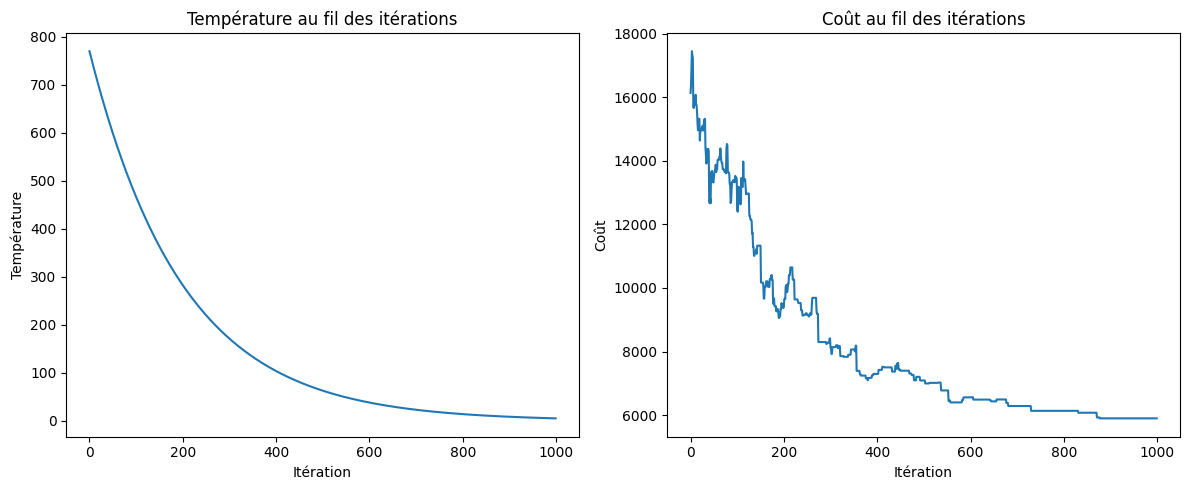

iteration 1 : 
Best found path: [ 0 19  6  8 20 12 21 13 11 14  2 15 23  7 10  3  4  9  5 22  1 17 18 16] 
distance : 5898.940148293468 
time elapsed : 1.024


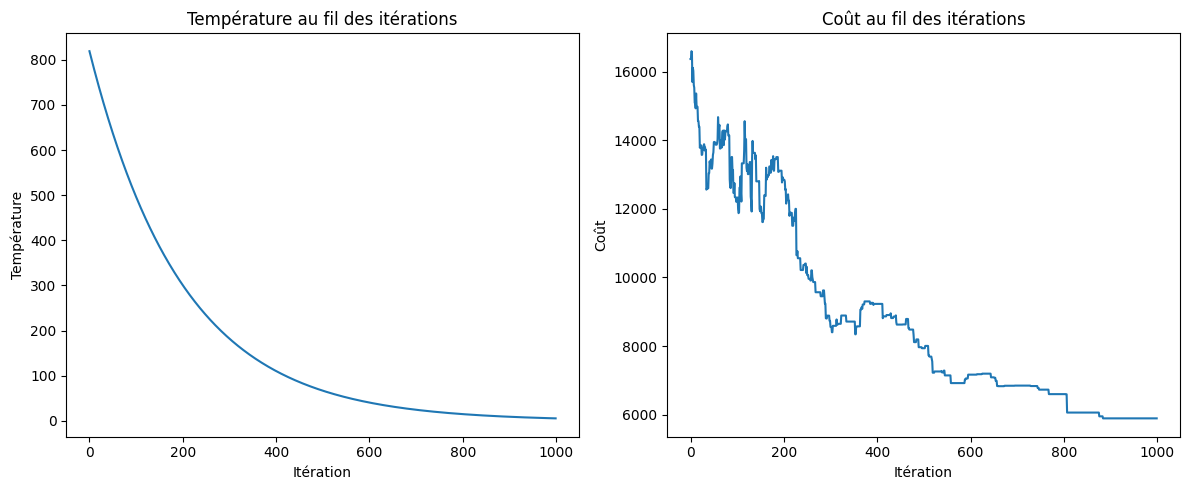

iteration 2 : 
Best found path: [ 0 16 18 17  5  9  4 22  1  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5890.920144624763 
time elapsed : 1.078


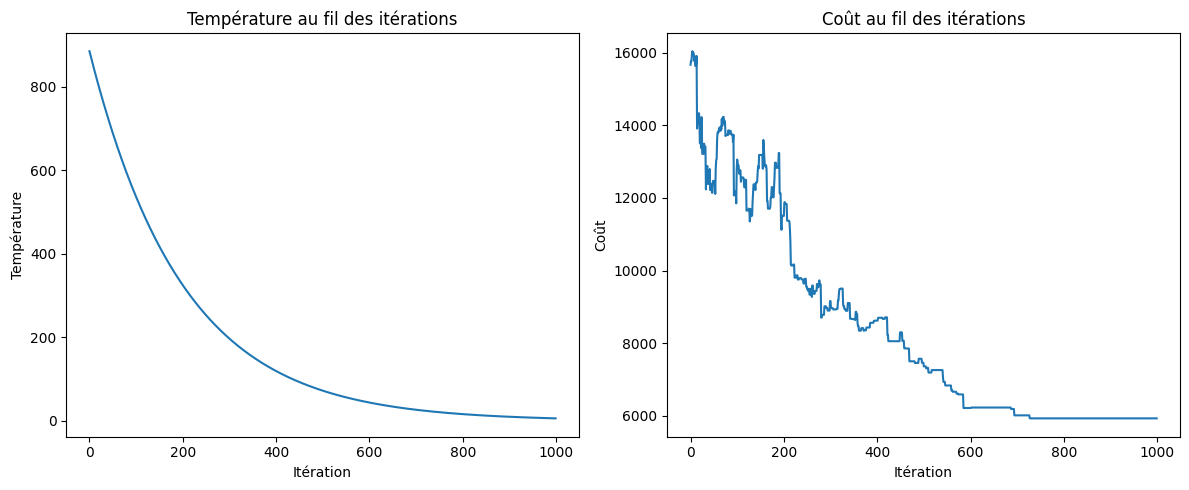

iteration 3 : 
Best found path: [ 9  4  1  3 16 10  7 23 15  2 14 13 11 21 12 20  8  6 19  0 18 17  5 22] 
distance : 5927.07174673941 
time elapsed : 1.068


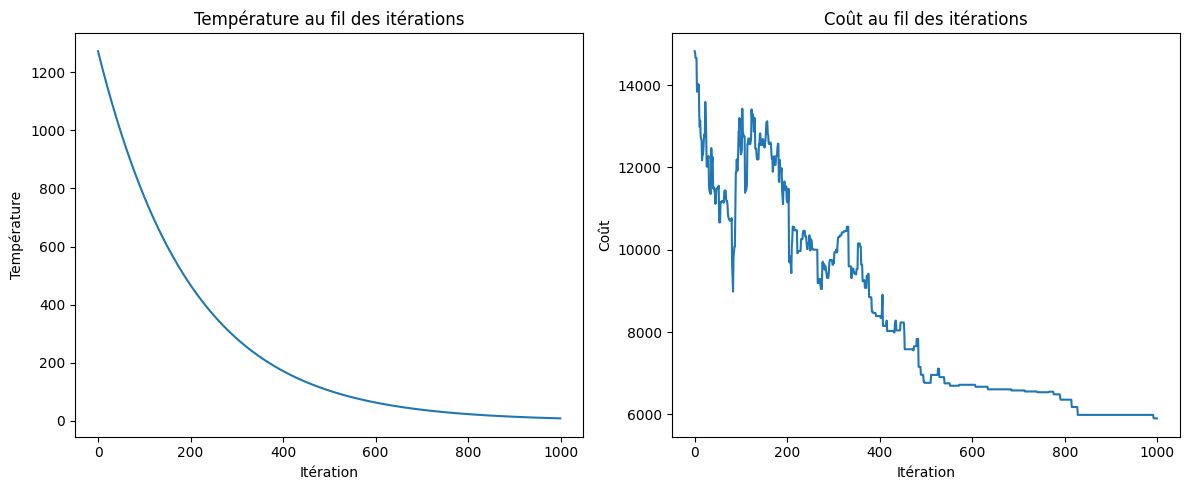

iteration 4 : 
Best found path: [23 15  2 14 11 13 21 12 20  8  6 19  0 18 17  5  1 22  9  4  3 16 10  7] 
distance : 5905.379582530452 
time elapsed : 1.057


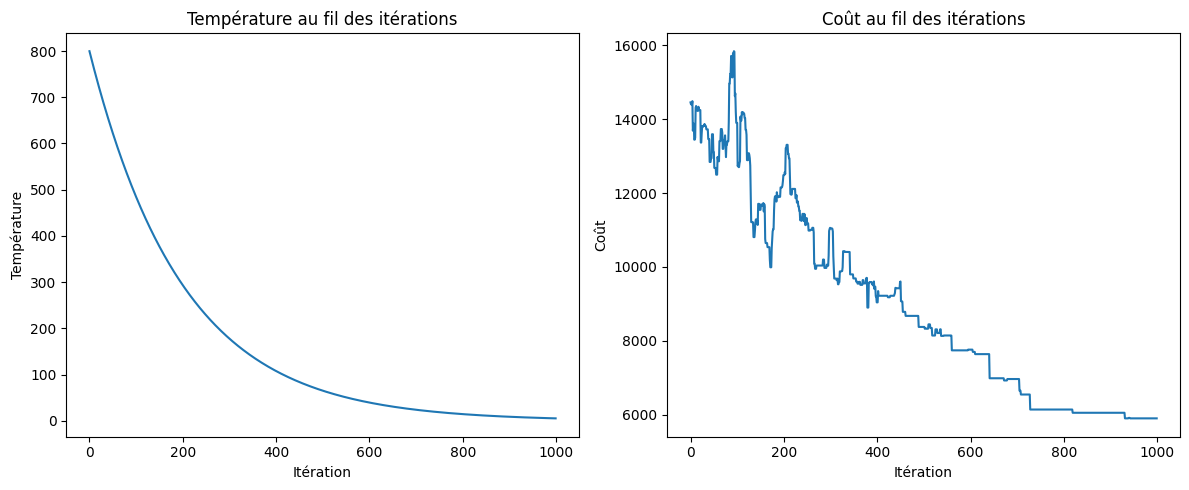

iteration 5 : 
Best found path: [12 21 13 11 14  2 15 23  7 10  3  1  4  9 22  5 17 18 16  0 19  6  8 20] 
distance : 5900.611335465434 
time elapsed : 1.091


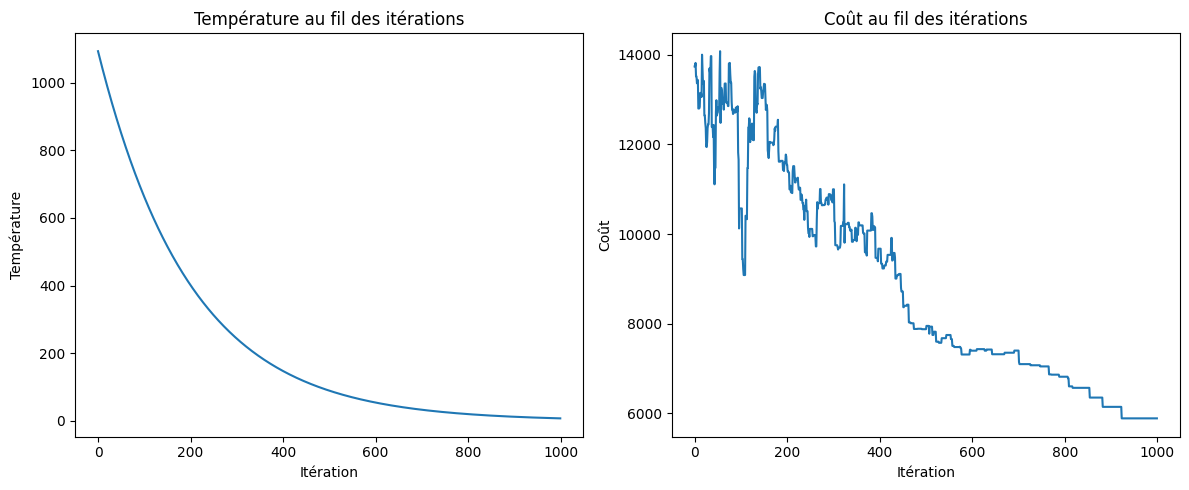

iteration 6 : 
Best found path: [11 14  2 15 23  7 10  3  1 22  4  9  5 17 18 16  0 19  6  8 20 12 21 13] 
distance : 5890.920144624763 
time elapsed : 1.097


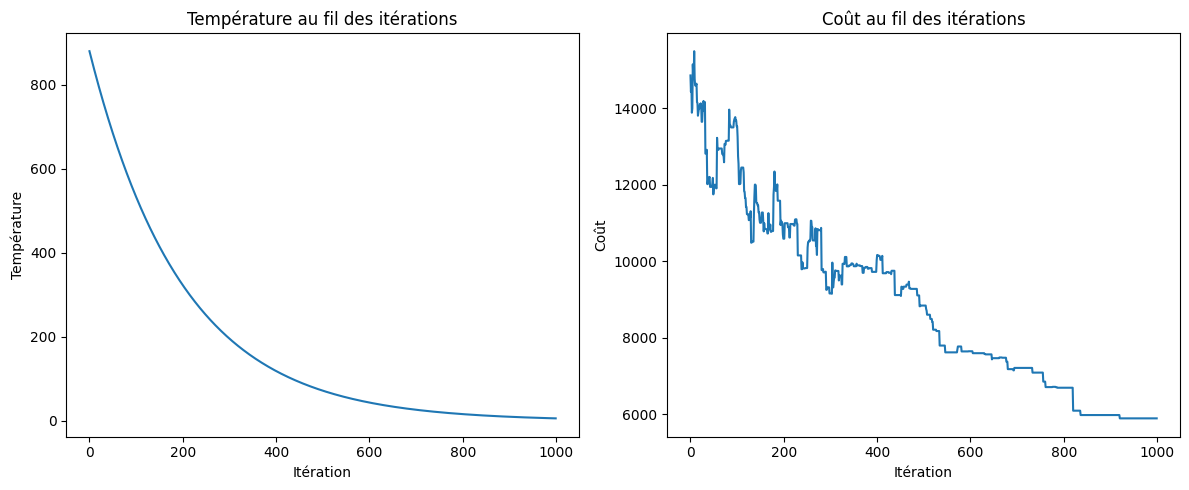

iteration 7 : 
Best found path: [14  2 15 23  7 10  3  4  9  5 22  1 17 18 16  0 19  6  8 20 12 21 13 11] 
distance : 5898.940148293468 
time elapsed : 1.06


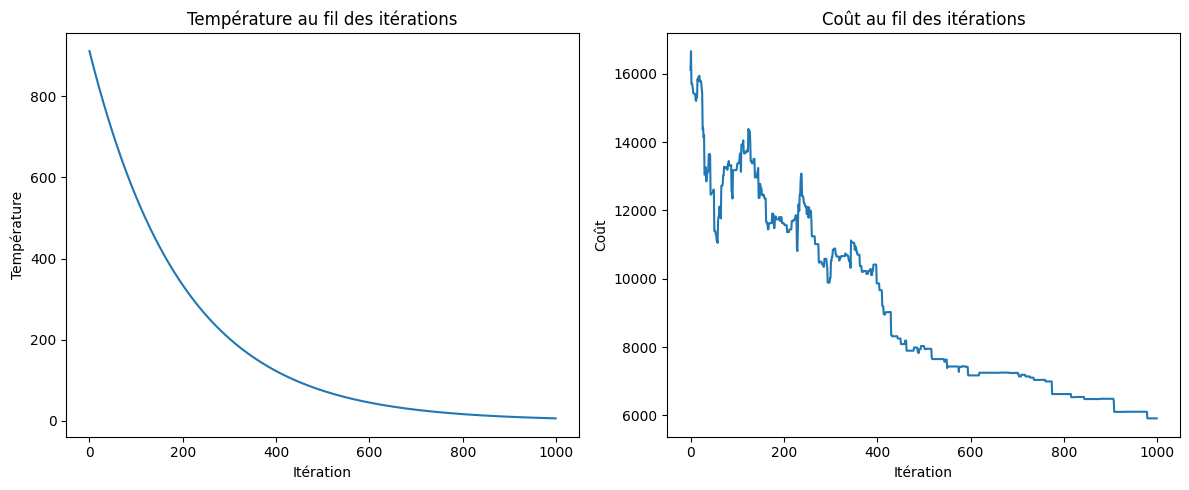

iteration 8 : 
Best found path: [20 12 21 11 13 14  2 15 23  7 10  3  1  4  9 22  5 17 18 16  0 19  6  8] 
distance : 5913.4074977347245 
time elapsed : 1.039


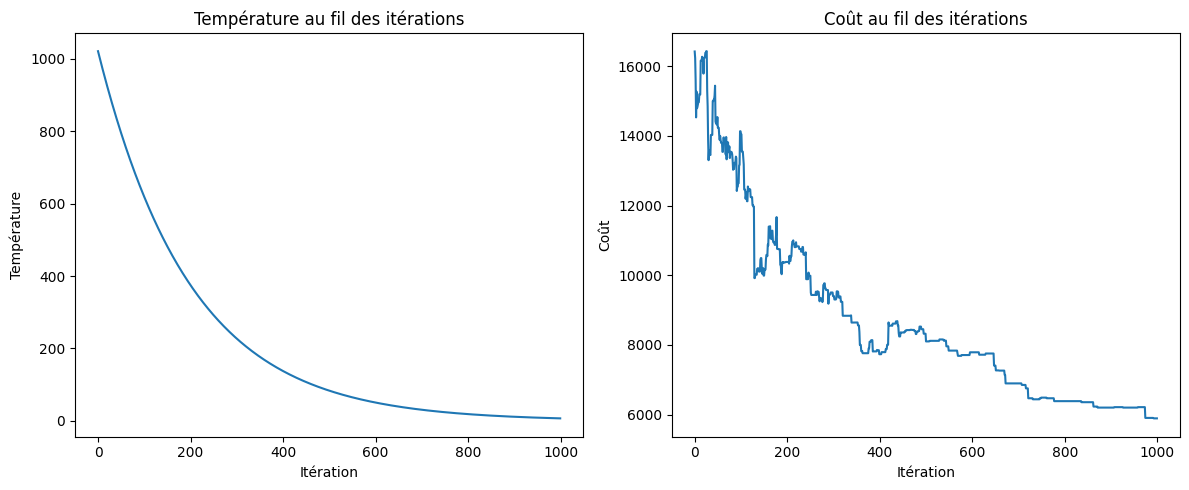

iteration 9 : 
Best found path: [ 0 16 18 17  5  1 22  9  4  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5891.715333525766 
time elapsed : 1.062


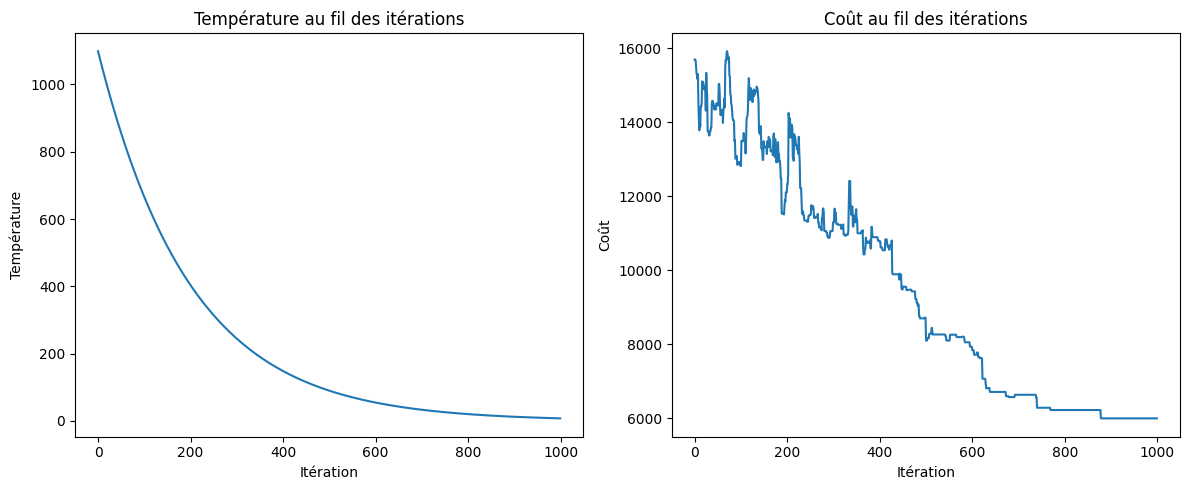

iteration 10 : 
Best found path: [20 12 21 13 11 14  2 15 23  7 10  3  1  4  9 22  5 17 18 19 16  0  6  8] 
distance : 5994.862214265464 
time elapsed : 1.095


In [ ]:
for i in range(10):
    result = simulated_annealing_results(M_berlin52_24_4,SA_Berlin)
    print("iteration {0} : \nBest found path: {1} \ndistance : {2} \ntime elapsed : {3} s".format(i + 1,result[0],result[1],result[2]))
    

- Jeux de données : st70_24_4

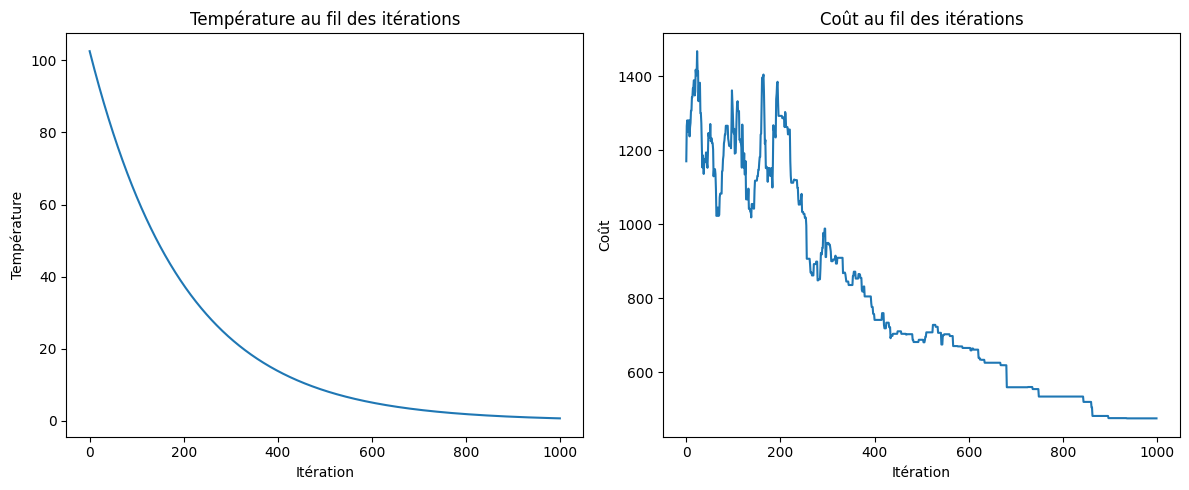

iteration 1 : 
Best found path: [14 18 15  6 16 17  7  0 12 10  4  9  3 20  2 19  1  5 21 11 23  8 13 22] 
distance : 475.3904030897929 
time elapsed : 1.096


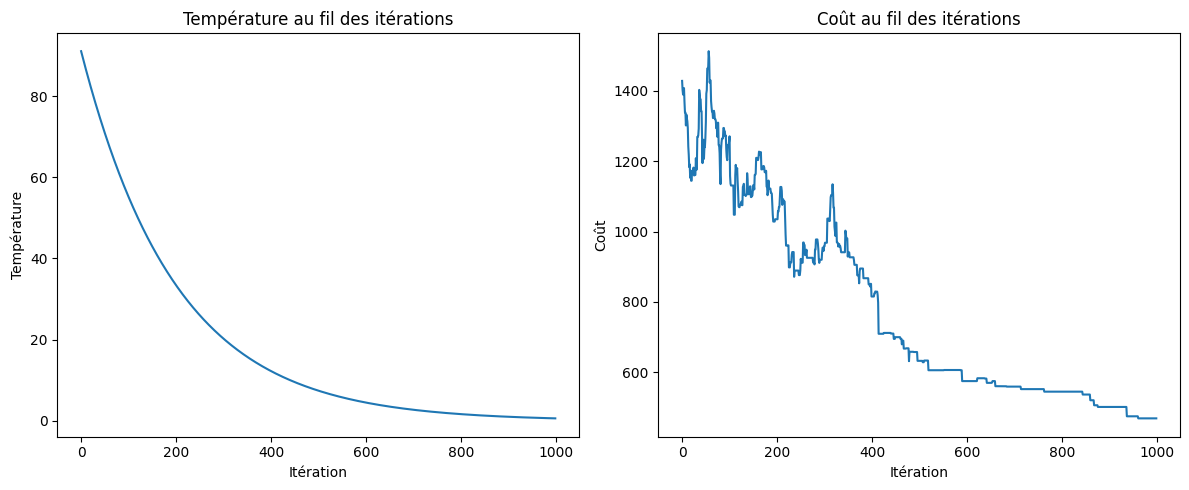

iteration 2 : 
Best found path: [14 18 16 17  7  6 15  0 12 10  4  9  3 20  2 19  1  5 21 11 23  8 13 22] 
distance : 468.8816373725349 
time elapsed : 1.052


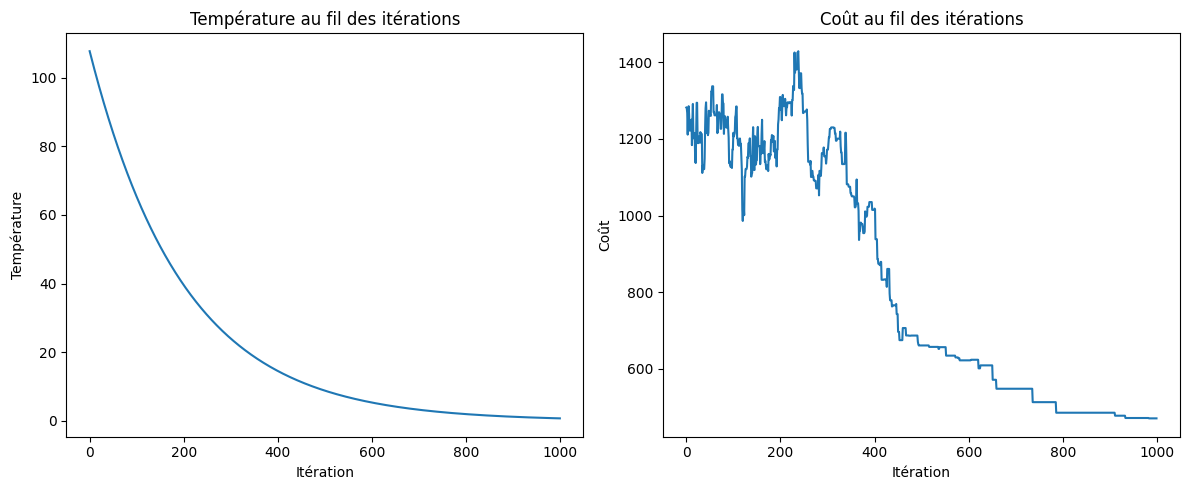

iteration 3 : 
Best found path: [ 4 10 12  9  0 15  6  7 17 16 18 14 22 13  8 23 11 21  5  1 19  2 20  3] 
distance : 470.61795599038106 
time elapsed : 1.028


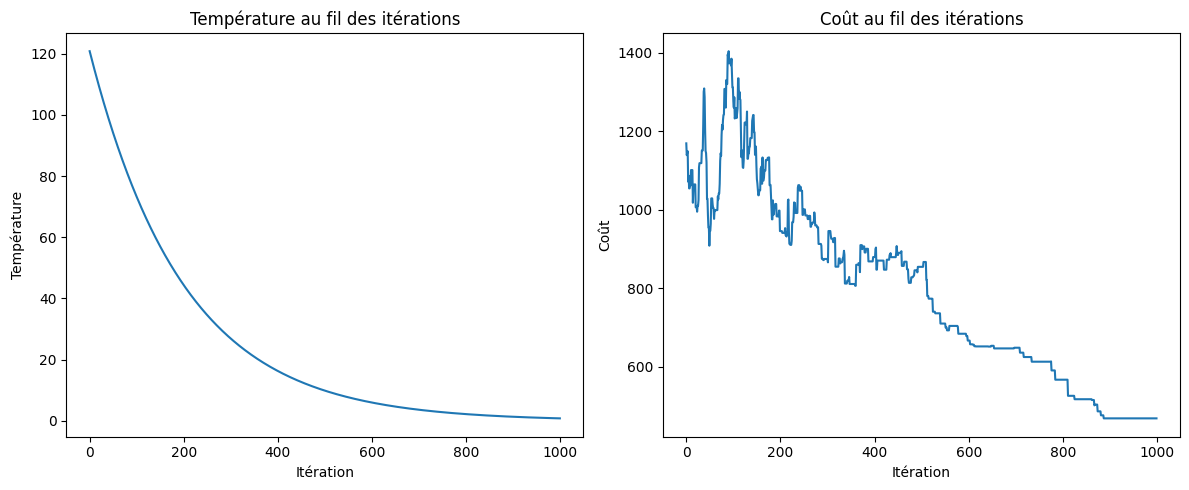

iteration 4 : 
Best found path: [16 17  7  6 15  0 12 10  4  9  3 20  2 19  1  5 21 11 23  8 13 22 14 18] 
distance : 468.8816373725349 
time elapsed : 1.058


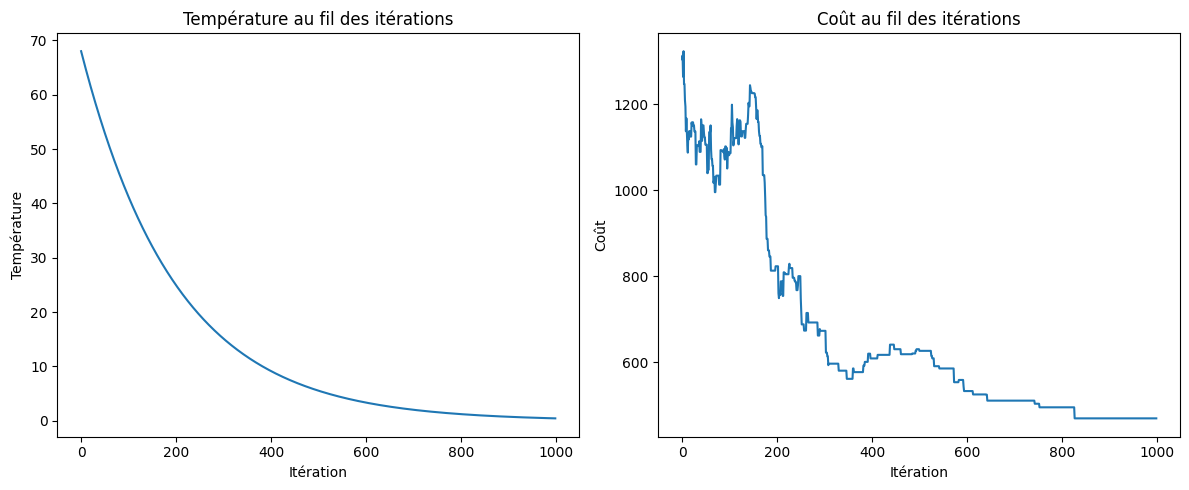

iteration 5 : 
Best found path: [17  7  6 15  0 12 10  4  9  3 20  2 19  1  5 21 11 23  8 13 22 14 18 16] 
distance : 468.8816373725349 
time elapsed : 1.079


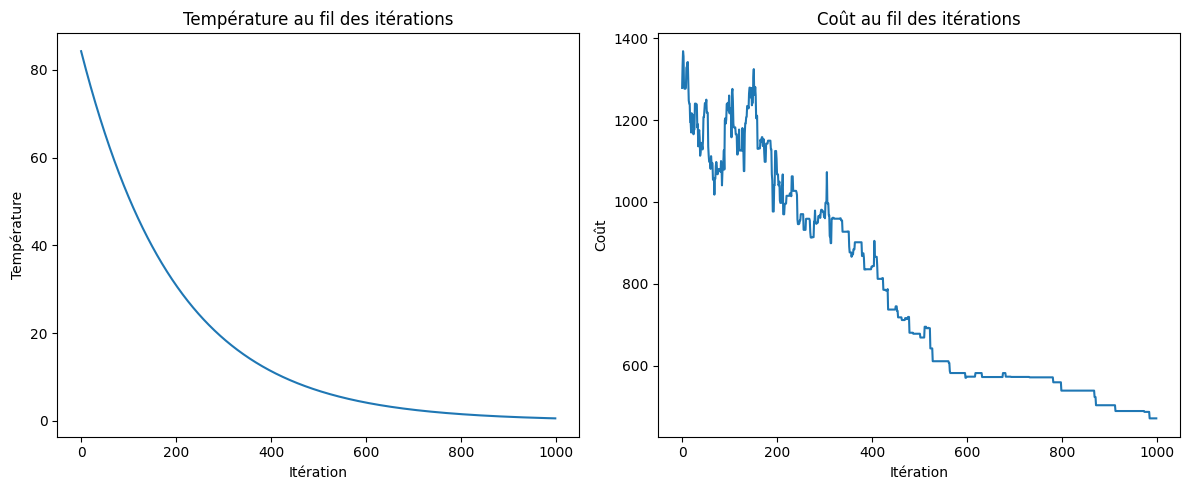

iteration 6 : 
Best found path: [23  8 13 22 14 18 16 17  7  6 15  0  9 12 10  4 20  3  2 19  1  5 21 11] 
distance : 471.4226135843439 
time elapsed : 1.044


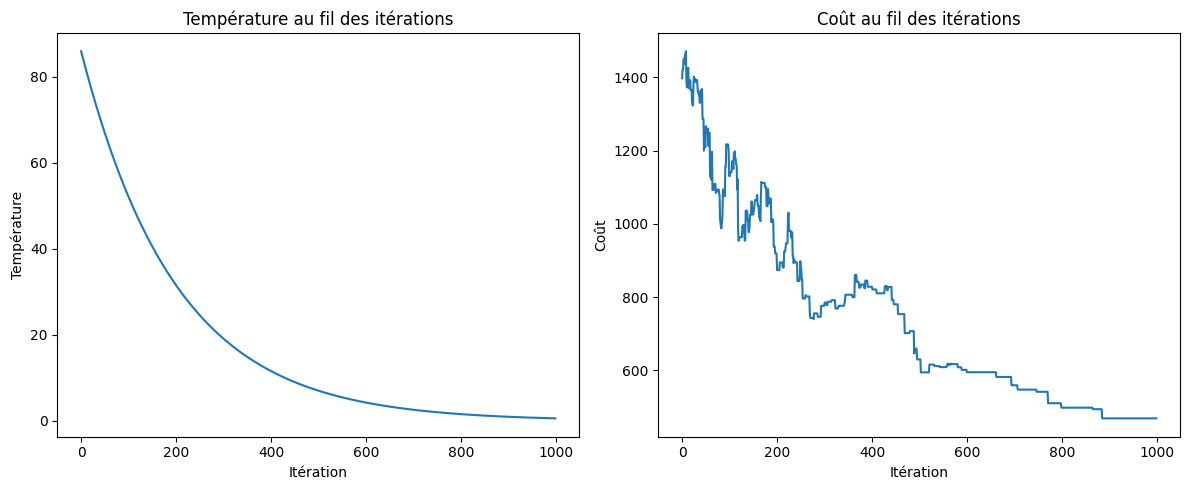

iteration 7 : 
Best found path: [ 4 10 12  0 15  6  7 17 16 18 14 22 13  8 23 11 21  5  1 19  2 20  3  9] 
distance : 468.8816373725349 
time elapsed : 1.041


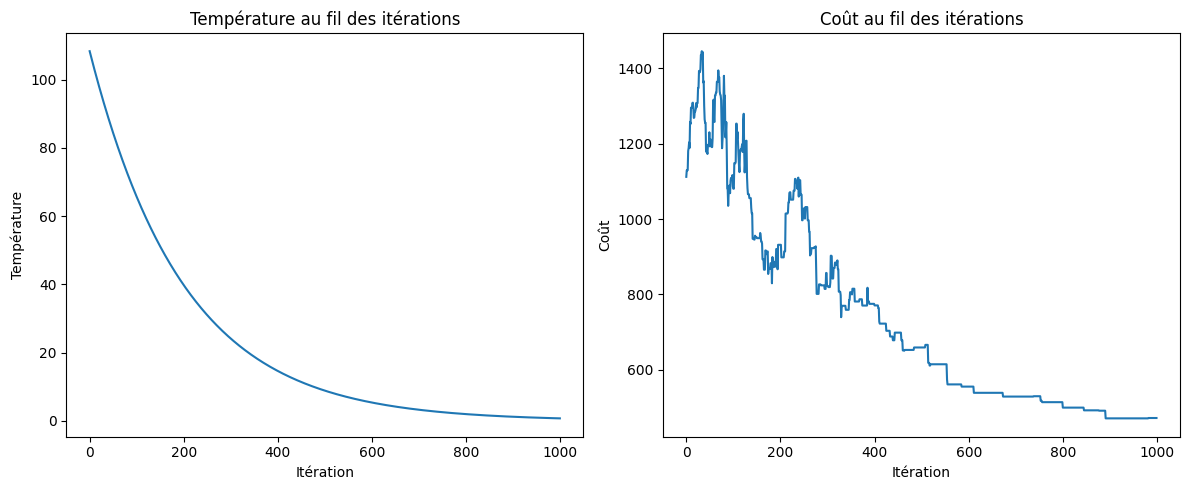

iteration 8 : 
Best found path: [ 7 17 16 18 14 22 13  8 23 11 21  5  1 19  2  3 20  4 10 12  9  0 15  6] 
distance : 471.4226135843438 
time elapsed : 1.039


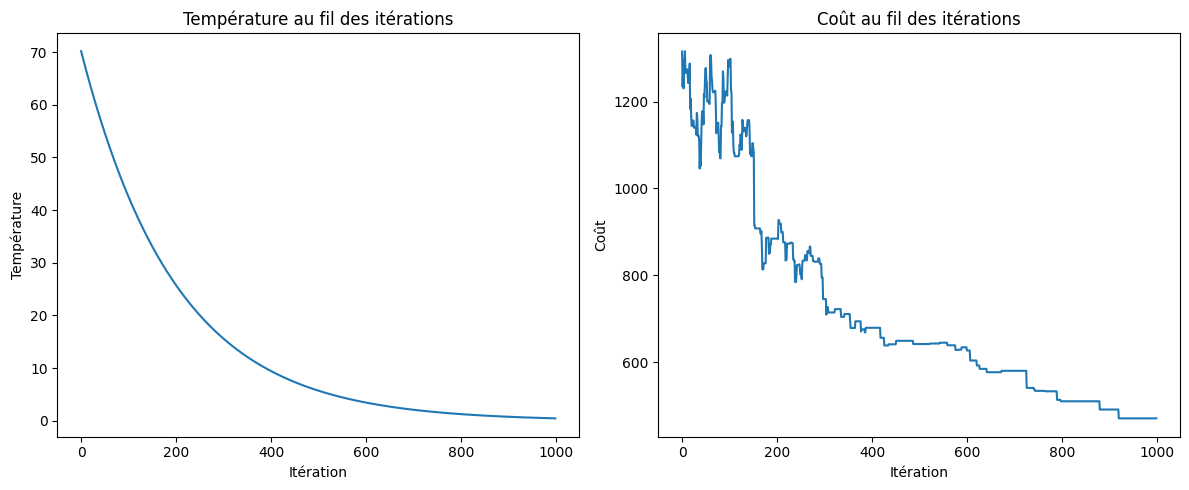

iteration 9 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0  9 12 10  4] 
distance : 470.617955990381 
time elapsed : 1.044


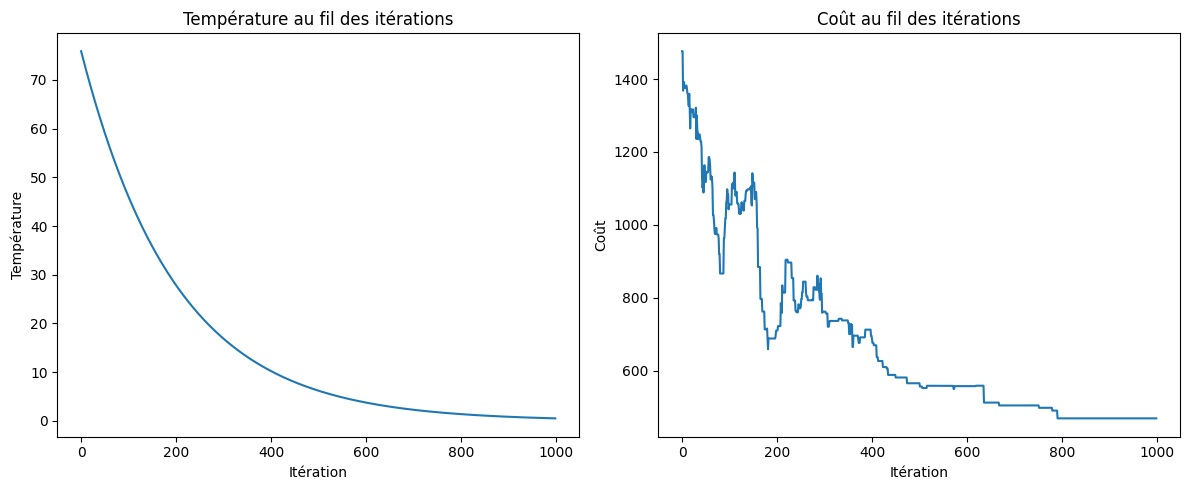

iteration 10 : 
Best found path: [11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9  3 20  2 19  1  5 21] 
distance : 468.8816373725349 
time elapsed : 1.034


In [212]:
for i in range(10):
    result = simulated_annealing_results(M_st70_24_4,SA_st)
    print("iteration {0} : \nBest found path: {1} \ndistance : {2} \ntime elapsed : {3}".format(i + 1,result[0],result[1],result[2]))
    

### Algorithme génétique :

In [213]:
def genetic_algorithm_results(M,t):
    best_solution, best_distance, avg_history, best_history, elapsed_time = genetic_algorithm_do_n(M,repeats=100)
    t.append((best_solution, best_distance, elapsed_time))
    plot_fitness_over_generations(avg_history, best_history)
    return best_solution, best_distance, elapsed_time

- Jeux de données : berlin52_24_4

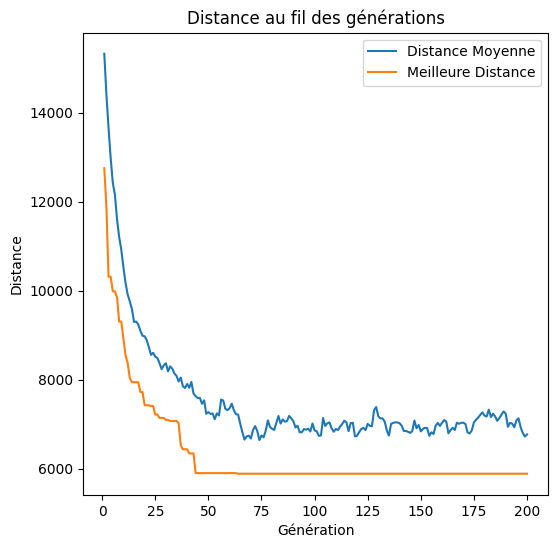

iteration 1 : 
Best found path: [ 0 16 18 17  5  9  4 22  1  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5890.920144624763 
time elapsed : 88.154


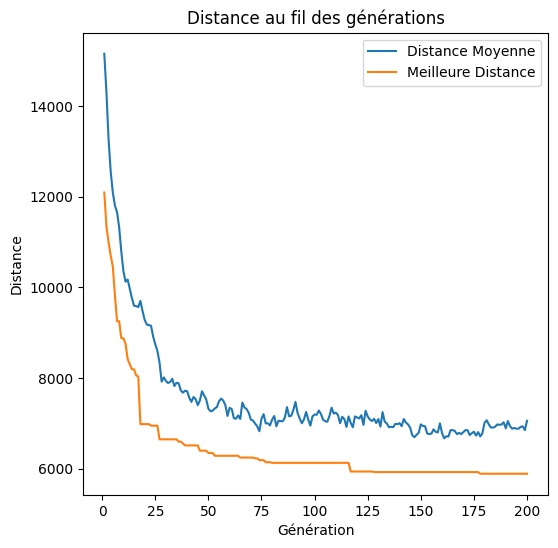

iteration 2 : 
Best found path: [12 21 13 11 14  2 15 23  7 10  3  1 22  4  9  5 17 18 16  0 19  6  8 20] 
distance : 5890.920144624763 
time elapsed : 86.367


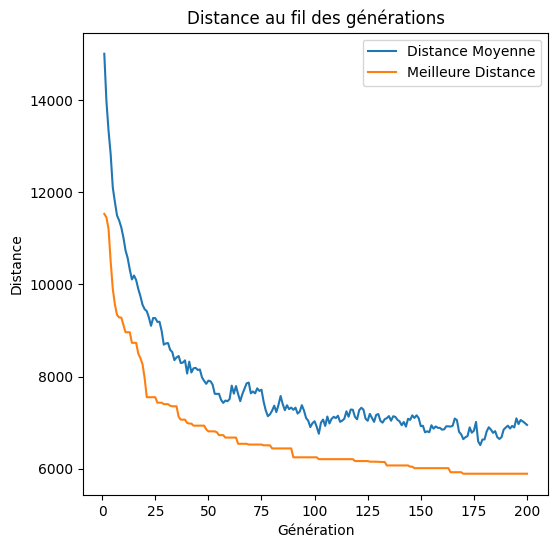

iteration 3 : 
Best found path: [ 0 16 18 17  5  9  4 22  1  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5890.920144624763 
time elapsed : 86.481


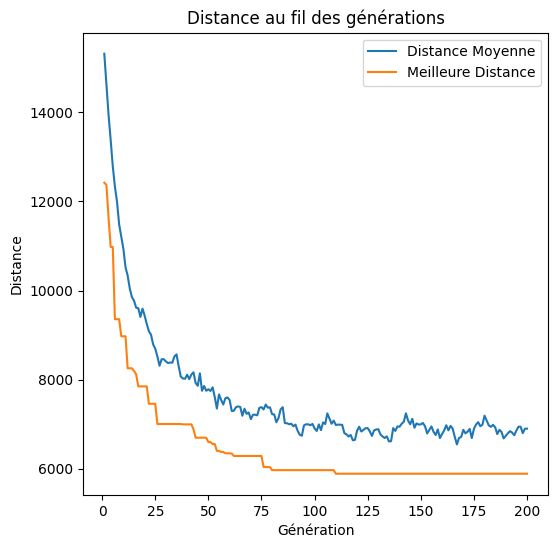

iteration 4 : 
Best found path: [12 21 13 11 14  2 15 23  7 10  3  1 22  4  9  5 17 18 16  0 19  6  8 20] 
distance : 5890.920144624763 
time elapsed : 88.627


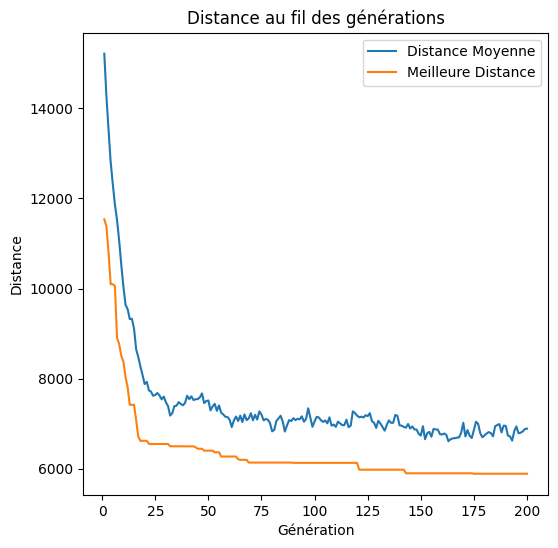

iteration 5 : 
Best found path: [ 0 16 18 17  5  9  4 22  1  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5890.920144624763 
time elapsed : 86.045


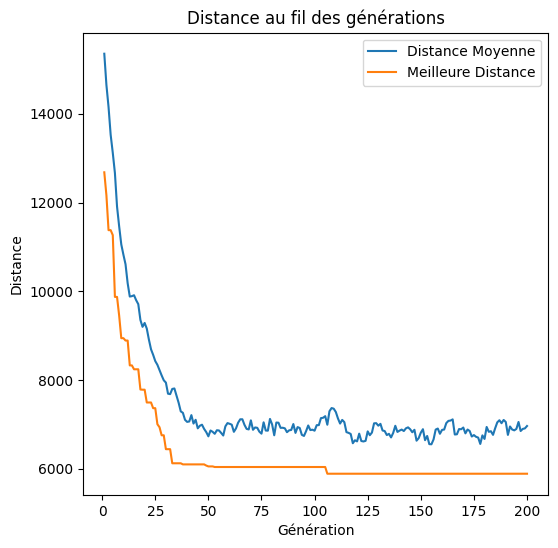

iteration 6 : 
Best found path: [ 0 16 18 17  5  9  4 22  1  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5890.920144624763 
time elapsed : 85.374


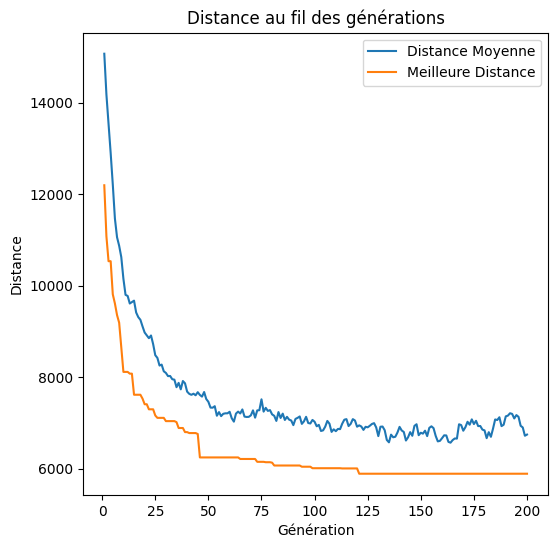

iteration 7 : 
Best found path: [ 0 16 18 17  5  9  4 22  1  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5890.920144624763 
time elapsed : 87.424


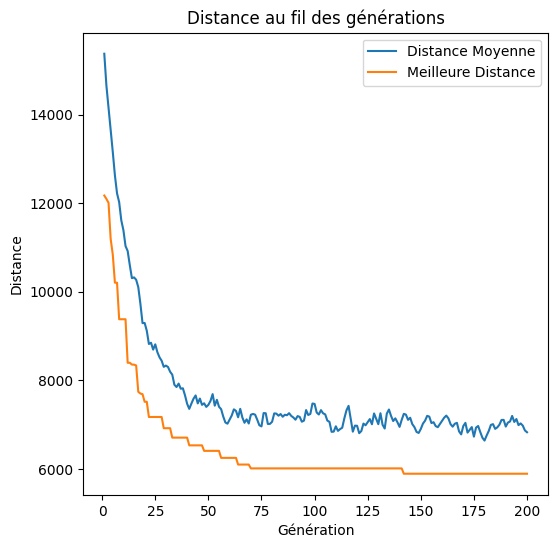

iteration 8 : 
Best found path: [13 11 14  2 15 23  7 10  3  1 22  4  9  5 17 18 16  0 19  6  8 20 12 21] 
distance : 5890.920144624763 
time elapsed : 87.252


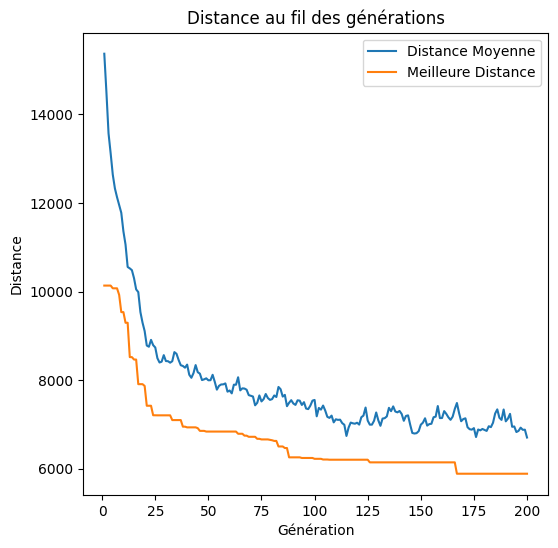

iteration 9 : 
Best found path: [ 0 16 18 17  5  9  4 22  1  3 10  7 23 15  2 14 11 13 21 12 20  8  6 19] 
distance : 5890.920144624763 
time elapsed : 84.902


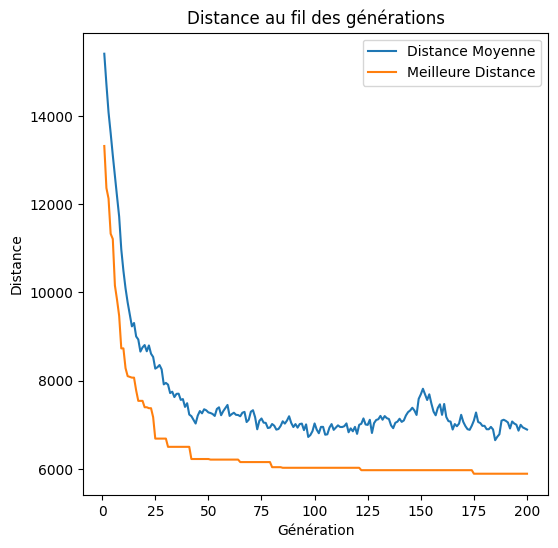

iteration 10 : 
Best found path: [12 21 13 11 14  2 15 23  7 10  3  1 22  4  9  5 17 18 16  0 19  6  8 20] 
distance : 5890.920144624763 
time elapsed : 85.339


In [214]:
for i in range(10):
    result = genetic_algorithm_results(M_berlin52_24_4,AG_Berlin)
    print("iteration {0} : \nBest found path: {1} \ndistance : {2} \ntime elapsed : {3} s".format(i + 1,result[0],result[1],result[2]))
    

- Jeux de données : st70_24_4

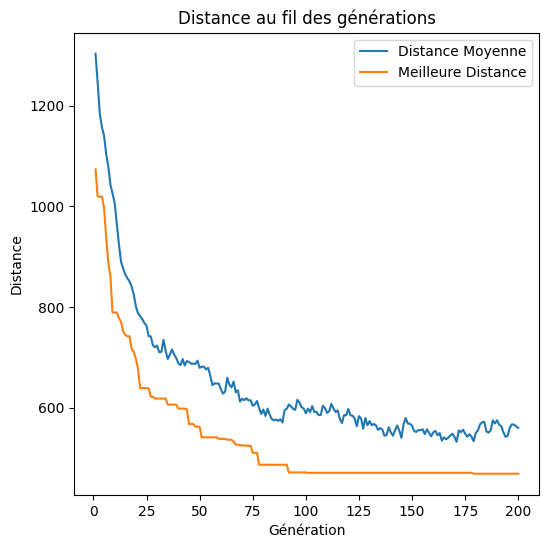

iteration 1 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 86.973


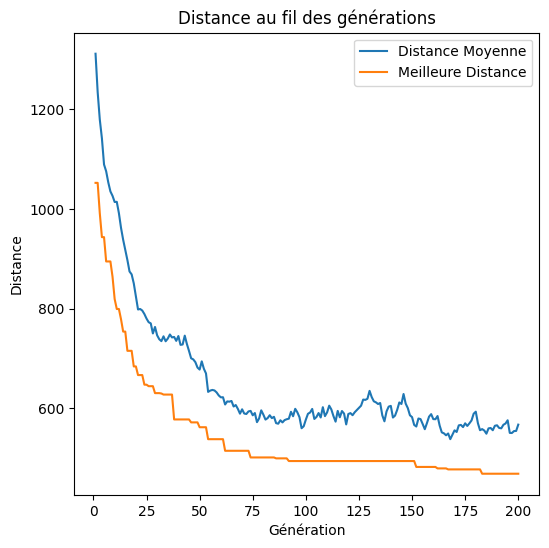

iteration 2 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 89.542


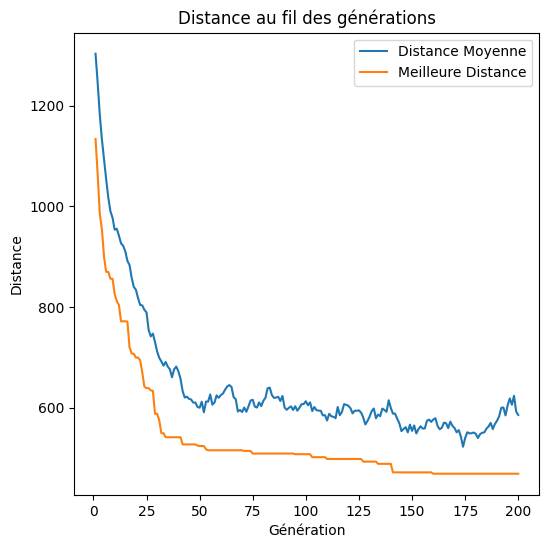

iteration 3 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 86.493


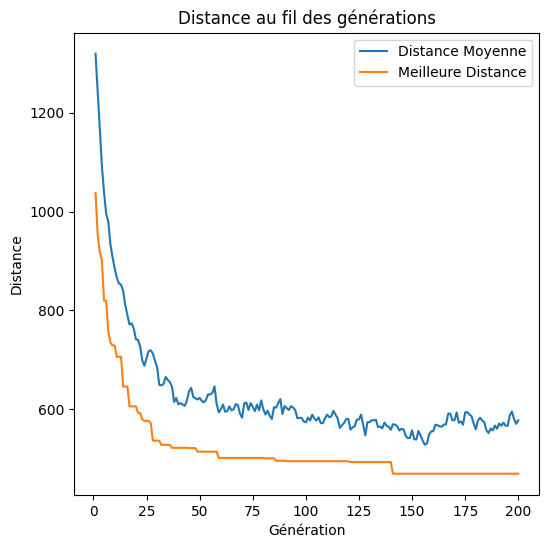

iteration 4 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 86.682


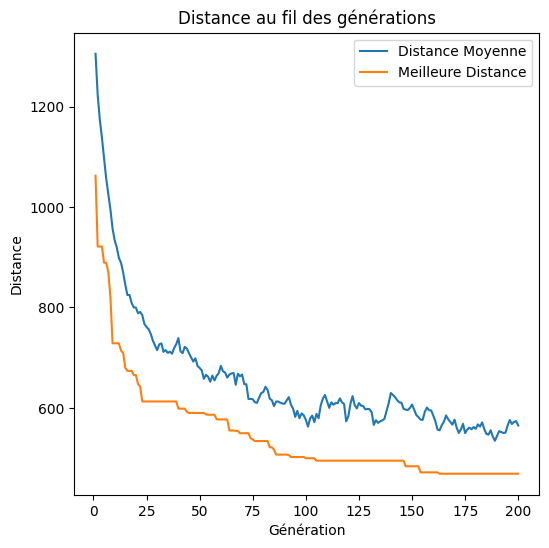

iteration 5 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 86.372


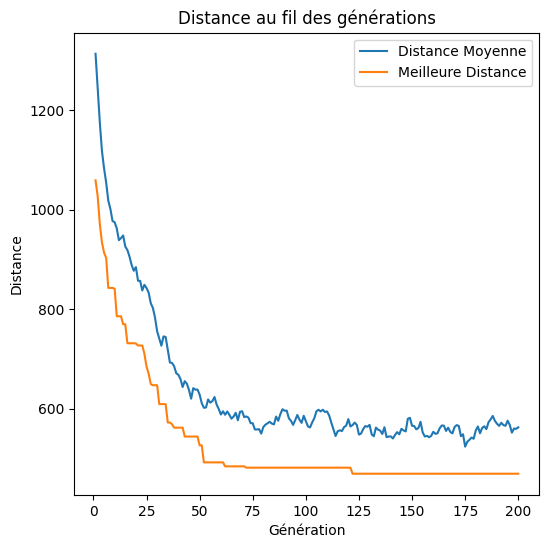

iteration 6 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 87.575


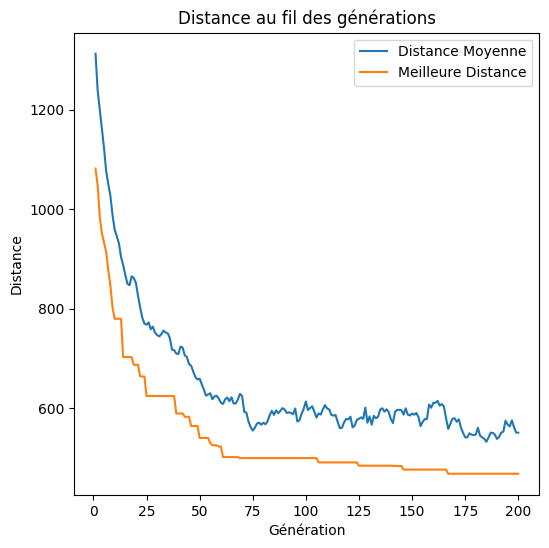

iteration 7 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 86.08


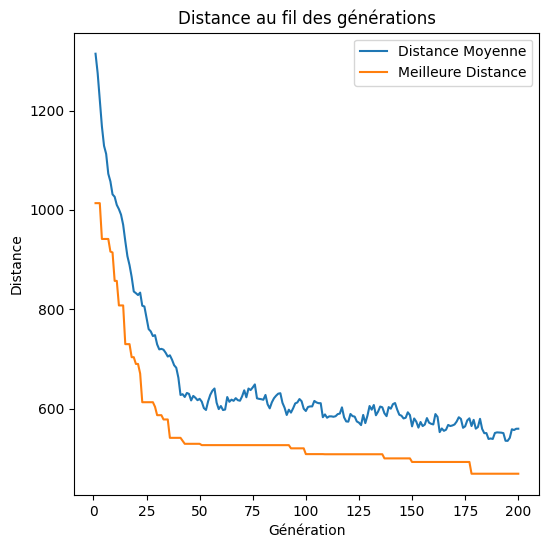

iteration 8 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 84.934


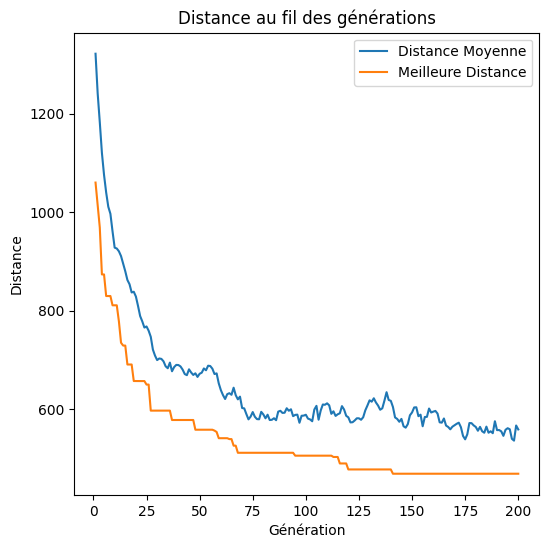

iteration 9 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 84.54


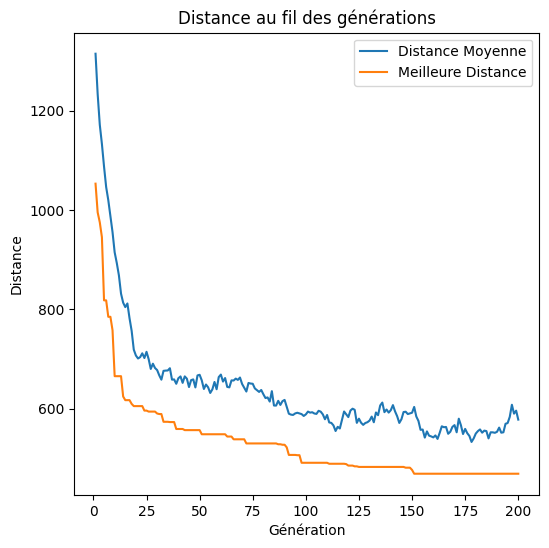

iteration 10 : 
Best found path: [ 3 20  2 19  1  5 21 11 23  8 13 22 14 18 16 17  7  6 15  0 12 10  4  9] 
distance : 468.88163737253484 
time elapsed : 84.814


In [215]:
for i in range(10):
    result = genetic_algorithm_results(M_st70_24_4, AG_st)
    print("iteration {0} : \nBest found path: {1} \ndistance : {2} \ntime elapsed : {3}".format(i + 1,result[0],result[1],result[2]))
    

### Moyenne des métriques enregistrées :

In [216]:
def metrics_average(t):
    cout_moyen = 0
    temps_moyen = 0
    j = 0
    for i in t:
        cout_moyen += i[1]
        temps_moyen += i[2]
        j+=1
    
    return round(cout_moyen/j,4), round(temps_moyen/j,4)

- Algorithme glouton:

In [217]:
berlin_metrics = metrics_average(greedy_Berlin)
st_metrics = metrics_average(greedy_st)
print("berlin52_24_4 :\nCout moyen : {0}\nTemps moyen: {1}\n".format(berlin_metrics[0], berlin_metrics[1]))
print("st70_24_4 :\nCout moyen : {0}\nTemps moyen: {1}\n".format(st_metrics[0], st_metrics[1]))

berlin52_24_4 :
Cout moyen : 7029.6059
Temps moyen: 0.0018

st70_24_4 :
Cout moyen : 565.4375
Temps moyen: 0.0016



- Algorithme du recuit simulé :

In [218]:
berlin_metrics = metrics_average(SA_Berlin)
st_metrics = metrics_average(SA_st)
print("berlin52_24_4 :\nCout moyen : {0}\nTemps moyen: {1}\n".format(berlin_metrics[0], berlin_metrics[1]))
print("st70_24_4 :\nCout moyen : {0}\nTemps moyen: {1}\n".format(st_metrics[0], st_metrics[1]))

berlin52_24_4 :
Cout moyen : 5911.2768
Temps moyen: 1.0671

st70_24_4 :
Cout moyen : 470.388
Temps moyen: 1.0515



- Algorithme génétique :

In [219]:
berlin_metrics = metrics_average(AG_Berlin)
st_metrics = metrics_average(AG_st)
print("berlin52_24_4 :\nCout moyen : {0}\nTemps moyen: {1}\n".format(berlin_metrics[0], berlin_metrics[1]))
print("st70_24_4 :\nCout moyen : {0}\nTemps moyen: {1}\n".format(st_metrics[0], st_metrics[1]))

berlin52_24_4 :
Cout moyen : 5890.9201
Temps moyen: 86.5965

st70_24_4 :
Cout moyen : 468.8816
Temps moyen: 86.4005



---

### 2.2. Discussion des résultats

Effectuez une analyse approfondie des performances des algorithmes sur les ensembles de données `berlin52_24_4` et `st70_24_4`, en abordant les points suivants :

1. **Comparaison des performances :**
   - Examinez les **coûts moyens des meilleurs chemins** atteints par chaque algorithme sur les deux ensembles de données. Identifiez quel algorithme se rapproche le plus des solutions optimales connues.
   - Discutez des différences de performance entre les ensembles de données. La taille ou la complexité de l'ensemble de données influence-t-elle les résultats ?

2. **Consistance :**
   - Évaluez la variabilité des résultats sur plusieurs exécutions pour chaque algorithme. Les résultats sont-ils cohérents ou présentent-ils des fluctuations significatives ?
   - Notez les tendances ou modèles observés, par exemple si un algorithme donne systématiquement des coûts plus élevés ou des temps d'exécution plus rapides.

3. **Efficacité :**
   - Comparez les **temps d'exécution moyens** des algorithmes. Quel est l'algorithme le plus rapide ? Le plus lent ? Existe-t-il des compromis entre l'efficacité computationnelle et la qualité de la solution ?

4. **Forces et faiblesses :**
   - Identifiez les points forts de chaque algorithme, comme la rapidité, la précision ou la fiabilité.
   - Discutez des limitations ou faiblesses rencontrées pendant les expérimentations, notamment la sensibilité à l'initialisation, la tendance à se piéger dans des minima locaux ou les exigences computationnelles élevées.

5. **Conclusions et implications :**
   - Résumez les observations principales tirées de votre analyse. Que suggèrent les résultats concernant l'applicabilité de chaque algorithme au TSP ?
   - Discutez des implications pour des ensembles de données plus larges. Quels algorithmes seraient les plus adaptés et pourquoi ?

Améliorez votre discussion en incluant des graphiques, tableaux ou visualisations pour illustrer et clarifier vos observations.

---

## 1. Comparaison des performances

- **Berlin52_24_4 :**
    - **Algorithme glouton :** Coût moyen du meilleur chemin de 7029, avec un temps d'exécution moyen de 0,0018 seconde.
    - **Recuit simulé :** Coût moyen de 5911 en environ 1,067 seconde.
    - **Algorithme génétique :** Meilleur coût moyen de 5890,9201, avec un temps d'exécution moyen de 86,5965 secondes.

- **St70_24_4 :**
    - **Algorithme glouton :** Coût moyen du meilleur chemin de 565,4375, avec un temps moyen de 0,0016 seconde.
    - **Recuit simulé :** Coût moyen de 470,388 en 1,0515 seconde.
    - **Algorithme génétique :** Meilleur coût moyen de 468,8816, avec un temps d'exécution moyen de 86,4005 secondes.

L'algorithme génétique fournit des coûts moyens très proches des solutions optimales connues, respectivement 5890,92 pour berlin52_24_4 et 468,88 pour st70_24_4. Cela indique qu'à chaque exécution, l'algorithme trouve presque toujours le trajet le plus court. Le recuit simulé performe également significativement mieux que l'algorithme glouton, mais légèrement moins bien que l'algorithme génétique.

Après avoir réalisé la question 3 avec les jeux de données **berlin52** et **st70**, qui sont plus volumineux que **Berlin52_24_4** et **St70_24_4**, nous avons constaté qu'il est difficile de trouver la solution optimale avec les trois algorithmes (recuit simulé, algorithme génétique et glouton) en utilisant les mêmes paramètres. Cela indique que l'augmentation de la taille du jeu de données influence négativement la qualité des résultats obtenus.


## 2. Consistance

- **Variabilité des résultats :** 
    - L'algorithme glouton, de nature déterministe, produit des résultats constants à chaque exécution.
    - Le recuit simulé et l'algorithme génétique peuvent générer des résultats différents à chaque exécution en raison de leur caractère stochastique. Cependant, les fluctuations observées sont généralement négligeables ou très faibles.
    
- **Tendances observées :**
    - L'algorithme glouton a tendance à produire des coûts éloignés de l'optimal, mais offre un temps d'exécution très faible.
    - Le recuit simulé génère des coûts proches de l'optimal avec un temps d'exécution modéré.
    - L'algorithme génétique atteint des coûts très proches, voire optimaux, mais au prix d'un temps d'exécution très élevé.

## 3. Efficacité

- **Temps d'exécution moyens pour Berlin52_24_4 :**
    - **Algorithme glouton :** 0,0018 secondes. 
    - **Recuit simulé :** 1,067 seconde. 
    - **Algorithme génétique :** 86,5965 secondes. 

- **Temps d'exécution moyens pour St70_24_4 :**
    - **Algorithme glouton :** 0,0016 seconde.
    - **Recuit simulé :** 1,0515 seconde
    - **Algorithme génétique :** 86,4005 secondes
    
- **Observations pour chaque algorithme :**
    - **Algorithme glouton :** Il est le plus rapide, mais produit des solutions de moindre qualité.
    - **Recuit simulé :** Il donne un équilibre entre temps d'exécution et qualité de la solution.
    - **Algorithme génétique :** Le temps computationnel significativement plus élevé, mais fournit les meilleures solutions.

Il existe donc un compromis entre l'efficacité computationnelle et la qualité de la solution. Si la qualité est la priorité, il est préférable de choisir l'algorithme génétique. Si le temps de calcul est plus critique, le recuit simulé est une meilleure option.

## 4. Forces et faiblesses

- **Algorithme glouton :**
    - **Forces :**
        - Exécution extrêmement rapide.
        - Implémentation simple.
    - **Faiblesses :**
        - Produit des solutions sous-optimales.
        - Pas adapté lorsque la qualité de la solution est critique.

- **Recuit simulé :**
    - **Forces :**
        - Produit des solutions de bonne qualité.
        - Temps d'exécution raisonnable.
    - **Faiblesses :**
        - Performance dépendante des paramètres (température initiale, taux de refroidissement, etc.).

- **Algorithme génétique :**
    - **Forces :**
        - Trouve les meilleures solutions parmi les trois algorithmes.
        - Efficace pour explorer un large espace de solutions grâce à son approche basée sur la population.
    - **Faiblesses :**
        - Temps computationnel significativement plus élevé.

Nous avons constaté que le recuit simulé et l'algorithme génétique sont sensibles à l'initialisation, ce qui peut les conduire à des minima locaux. L'algorithme glouton se piège également dans des minima locaux en raison de son approche déterministe. De plus, l'algorithme génétique nécessite des ressources computationnelles élevées, augmentant les temps d'exécution, surtout avec de grands jeux de données.

## 5. Conclusions et implications

En conclusion, le recuit simulé et l'algorithme génétique fournissent des résultats proches, voire optimaux, pour le problème du voyageur de commerce. L'algorithme glouton, bien que rapide, produit des solutions de moindre qualité et ne constitue pas une option viable lorsque l'optimalité du chemin est essentielle.

Pour des ensembles de données plus larges, le recuit simulé serait plus adapté que l'algorithme génétique, car le temps de calcul de l'AG deviendrait prohibitif comparé à celui du SA. Ainsi, le recuit simulé offre un bon compromis entre qualité de solution et efficacité computationnelle pour des problèmes de plus grande envergure.


## **3. Question optionnelle (Bonus)**

Cette question est facultative et permet d'obtenir jusqu'à 5 points bonus pour l'exécution de votre programme sur les ensembles de données complets, `berlin52` et `st70`.

### Barème d'évaluation :

- **5 points** : Les algorithmes de recuit simulé (SA) et Génétique (GA) atteignent la solution optimale pour les deux ensembles de données.
- **4 points** : Les algorithmes SA et GA atteignent des solutions à moins de 5 % de l'optimal pour les deux ensembles.
- **3 points** : Les algorithmes SA et GA surpassent les algorithmes gloutons pour les deux ensembles.
- **2 points** : L'un des algorithmes SA ou GA atteint la solution optimale pour les deux ensembles.
- **1 point** : L'un des algorithmes SA ou GA dépasse les algorithmes gloutons pour les deux ensembles.

Incluez le code source nécessaire pour démontrer vos résultats. L'implémentation de base des algorithmes SA et GA doit rester cohérente avec les parties principales de ce devoir, seules les valeurs des paramètres pouvant varier.

### Algorithme glouton : 

- berlin52 :

In [68]:
result = gloutonAlgorithme(M_berlin52)
print("Best found path: {0} \ndistance : {1} \ntime elapsed : {2}\n".format(result[0],result[1],result[2]))

Best found path: [40, 38, 37, 39, 36, 35, 34, 44, 46, 48, 24, 5, 15, 6, 4, 25, 12, 28, 27, 26, 47, 13, 14, 52, 11, 51, 33, 43, 10, 9, 8, 41, 19, 45, 32, 49, 1, 22, 31, 18, 3, 17, 21, 23, 20, 50, 16, 29, 30, 42, 7, 2, 40] 
distance : 8182.1915557256725 
time elapsed : 0.01



- st70 :

In [69]:
result = gloutonAlgorithme(M_st70)
print("Best found path: {0} \ndistance : {1} \ntime elapsed : {2}\n".format(result[0],result[1],result[2]))

Best found path: [42, 18, 4, 2, 7, 32, 3, 8, 28, 26, 49, 55, 19, 24, 15, 57, 63, 22, 59, 38, 69, 31, 13, 29, 70, 35, 23, 1, 36, 16, 47, 37, 58, 50, 10, 52, 60, 12, 21, 34, 33, 54, 62, 48, 67, 56, 65, 51, 11, 64, 5, 53, 66, 6, 41, 43, 17, 9, 40, 61, 39, 45, 25, 46, 27, 68, 44, 30, 20, 14, 42] 
distance : 761.6890898866324 
time elapsed : 0.031



### Le recuit simulé :

- berlin52 :

Best tour found: [31 48 34 33 35 38 36 39 44 18 40  7  8  9 42 32 50 10 51 13 12 46 25 26
 27 11 24  3  5 14  4 37 23 47 45 43 15 28 49 19 22 29  1  6 41 20 30 16
  2 17 21  0]
Total distance of the best tour: 7918.0056380754595


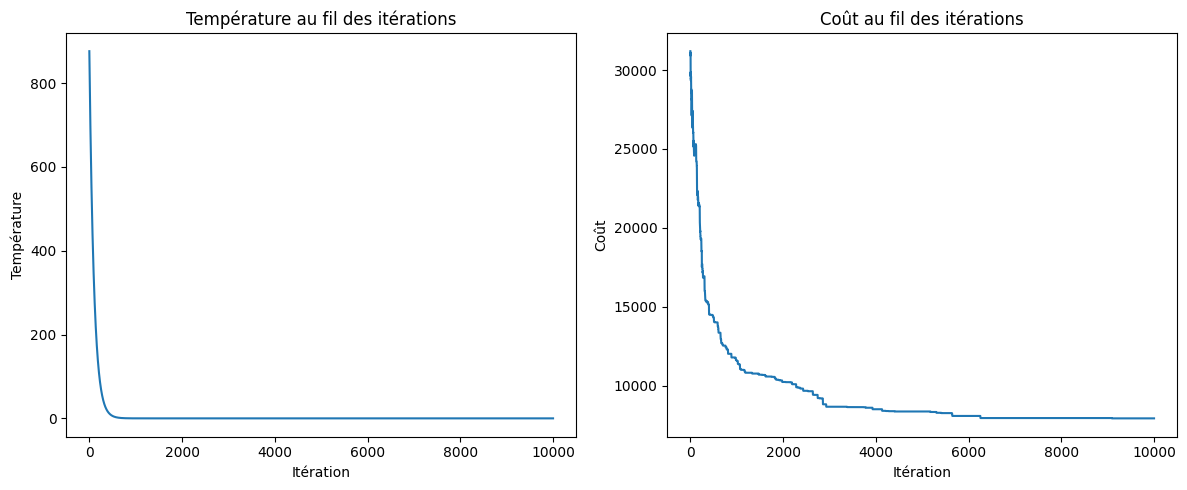

In [52]:
initial_temp = get_initial_temperature(M_berlin52)

best_tour, best_distance, temperatures, costs, elapsed_time = simulated_annealing_do_n(M_berlin52,initial_temp,0.99,10000,10)  

print("Best tour found:", best_tour)
print("Total distance of the best tour:", best_distance)

plot_temperature_and_cost(temperatures, costs)

- st70 :

Best tour found: [18 25 54 48  7 27 13 19 29  2 31  3 17 41  5 40 42 43 67 26 45 44 24 38
 60 39  8 16 20 33 11 59 32 61 53 47 66 55 10 63 64 50 51  9  4 52 49 57
 36 46 15  0 35 22 12 28 69 34 68 30 37 58 21 65 62 56 14 23  1  6]
Total distance of the best tour: 706.0410832575109


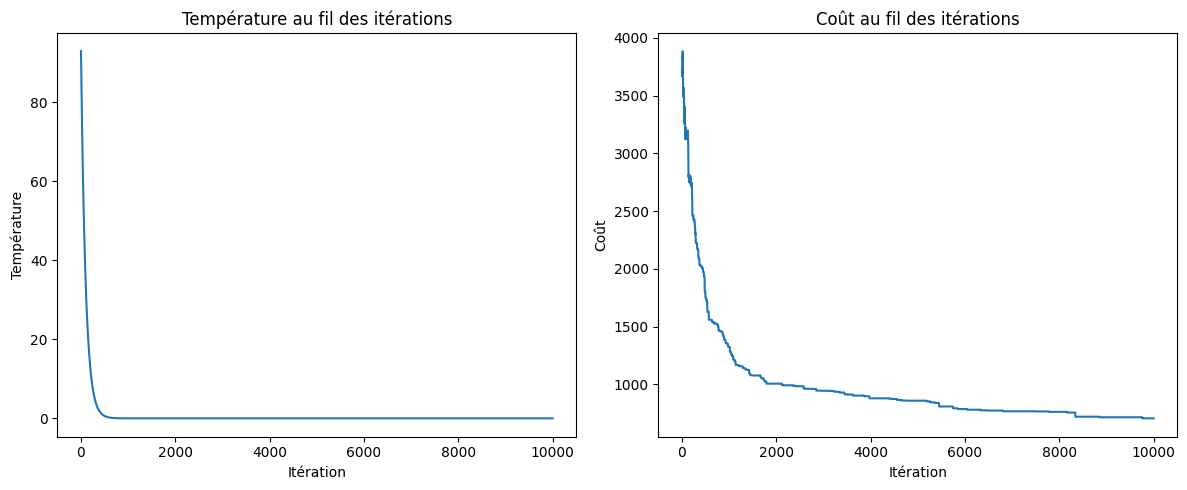

In [73]:
initial_temp = get_initial_temperature(M_st70)

best_tour, best_distance, temperatures, costs, elapsed_time = simulated_annealing_do_n(M_st70,initial_temp,0.99,10000,10)  

print("Best tour found:", best_tour)
print("Total distance of the best tour:", best_distance)

plot_temperature_and_cost(temperatures, costs)

### l'algorithme génétique :

- berlin52 :

Best solution found: [26 25 46 12 13 51 10 50 32 42  8  9  7 40 18 44 31 48  0 21 20 29 41  1
  6 16  2 17 30 22 19 49 28 15 45 43 33 34 35 38 39 37 36 47 23  4 14  5
  3 24 11 27]
Total distance of the best solution: 7848.291539422159


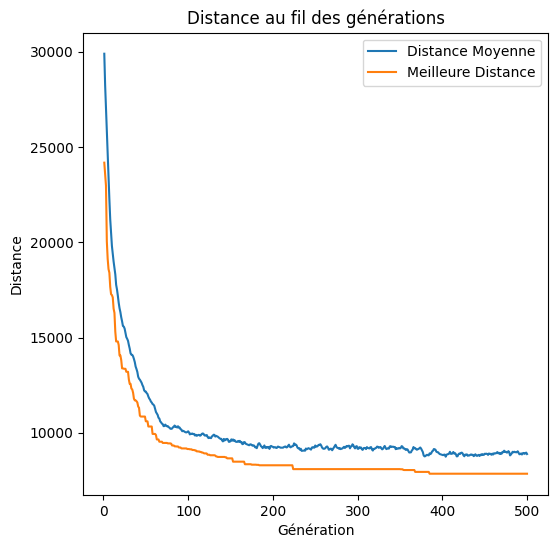

In [78]:
best_solution, best_distance, avg_history, best_history, elapsed_time = genetic_algorithm_do_n(M_berlin52,500,500,0.9,0.01,0.01,"tournament",5,10)


print("Best solution found:", best_solution)
print("Total distance of the best solution:", best_distance)

plot_fitness_over_generations(avg_history, best_history)

- st70 :

Best solution found: [29 43 67  8 26 45 24 44 39 60 38 61 53 47 66 10 63 64 55 50 49 57 36 46
 15 22  0 35 28 12 69 30 68 34 56 23 14 62 58 37 21 65 52  4  9 51 59 32
 11 33 20 16 42 40  5 41 17  3  1  6 18 54 48 25  7 27 31  2 13 19]
Total distance of the best solution: 695.9927256774737


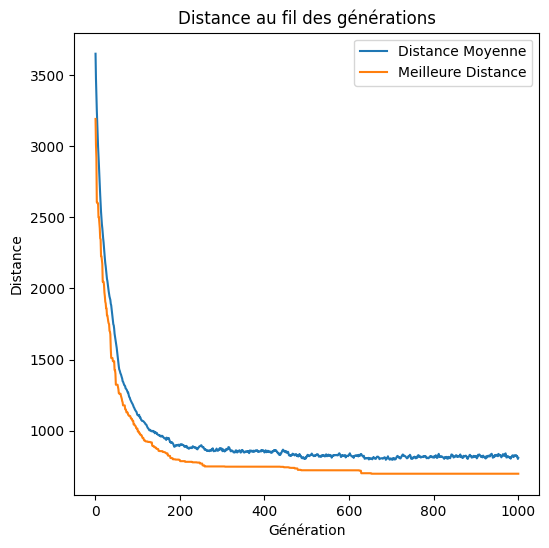

In [82]:
best_solution, best_distance, avg_history, best_history,elapsed_time = genetic_algorithm_do_n(M_st70,500,1000,0.9,0.01,0.01,"tournament",5,10)


print("Best solution found:", best_solution)
print("Total distance of the best solution:", best_distance)
plot_fitness_over_generations(avg_history, best_history)

### Resultats de la question 3:
- berlin52 :<br>
Solution optimale : **7542** + 5% = 7919 <br>
Algorithme glouton : 8182.19<br>
SA : 7918<br>
AG : 7848.29<br><br>
- st70:<br>
Solution optimale : **675** + 5% = 708.75<br>
Algorithme glouton : 761.68<br>
SA : 706.04<br>
AG : 695.99<br>


---

## **Critères d'évaluation**

- **Effort global dans le rapport (10%)**
- **Implémentation de l'algorithme glouton (20%)**
- **Implémentation de l'algorithme de recuit simulé (15%)**
- **Implémentation de l'algorithme génétique (25%)**
- **Exécution (15%)**
- **Analyse des résultats (15%)**

---

## **Ressources**

Comme pour les devoirs précédents, il est essentiel de citer toutes les sections de votre code dérivées de sources externes, comme des sites web, des manuels ou d'autres matériaux. Cela inclut l'utilisation de bibliothèques, même si vous êtes déjà familier avec leurs concepts.

L'utilisation d'intelligence artificielle pour améliorer la productivité en programmation est de plus en plus courante et appelée à se développer. Bien que ces technologies puissent être employées pour aider dans les devoirs, il est essentiel que vous compreniez pleinement les concepts évalués, car ces outils ne seront pas disponibles pendant les évaluations en personne.

Si vous utilisez une assistance par IA, documentez soigneusement vos interactions. Incluez les outils et leurs versions dans votre rapport, ainsi qu'une transcription de toutes les interactions. La plupart des assistants IA conservent une trace de vos conversations. Il est conseillé de créer une nouvelle conversation spécifiquement pour ce devoir et de réutiliser ce fil de discussion de manière cohérente tout au long de votre travail. Assurez-vous que cette conversation est exclusivement axée sur le devoir. Ajoutez la transcription de la conversation dans la section de références de votre Jupyter Notebook.

## Articles

### Genetic Algorithms Explained By Example: [View video](https://youtu.be/uQj5UNhCPuo?si=-dPJDmbVVlpUnD4A)
### Simulated annealing: [View article](https://medium.com/@francis.allanah/travelling-salesman-problem-using-simulated-annealing-f547a71ab3c6)
### Genetic algorithm: [View article](https://medium.com/aimonks/traveling-salesman-problem-tsp-using-genetic-algorithm-fea640713758)
### Greedy algorithm: [View article](https://www.tutorialspoint.com/data_structures_algorithms/travelling_salesman_problem.htm)

---

## Documentation

### CSI4506:
- [Lectures](https://turcotte.xyz/teaching/csi-4506/course-schedule.html)

### numpy:
- [Introduction to NumPy](https://www.w3schools.com/python/numpy/numpy_intro.asp)

### matplotlib:
- [Matplotlib Documentation](https://matplotlib.org)


---

## **Questions**

- Vous pouvez poser des questions dans le forum de discussion Brightspace sous le sujet « Devoir ».
- Alternativement, vous pouvez envoyer un courriel à l'un des quatre assistants pédagogiques. Cependant, l'utilisation du forum est fortement préférée, car elle permet à tous les étudiants de bénéficier des questions et des réponses fournies par les assistants pédagogiques.